In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


# RES = 30

In [3]:
RES = 30

In [4]:
save_dir_root = '../data/ldle1/noisyswissroll_sparse'+str(RES)+'/'

In [5]:
X, labelsMat, ddX = datasets.Datasets().noisyswissroll(noise=0, RES=RES)

X.shape =  (990, 3)


# LDLE

In [12]:
ldle_obj = ldle.LDLE(X=X, eta_min=3, k=7, max_iter0=30, N=100,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

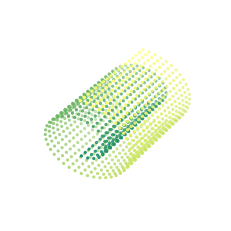

In [13]:
ldle_obj.vis.data(X, labelsMat[:,0], cmap='summer')

Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 247 points processed...
A_k, Atilde_k: 494 points processed...
A_k, Atilde_k: 741 points processed...
A_k, Atilde_k: 988 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 247 points processed...
local_param: 494 points processed...
local_param: 741 points processed...
local_param: 988 points processed...
local_param: all 990 points processed...
After iter 1, max distortion is 4.286479
After iter 2, max distortion is 3.404376
After iter 3, max distortion is 3.404376
Max local distortion = 3.404376058488952
###############
Took 1.3 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views...
# non-empty views with sz < 2 = 990
#nodes in views with sz < 2 = 990
Remaining #nodes in views with sz < 2 = 0
# non-empty views with sz < 3 =

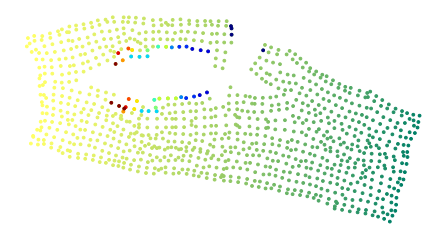

###############
Took 0.3 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.002768017070104585


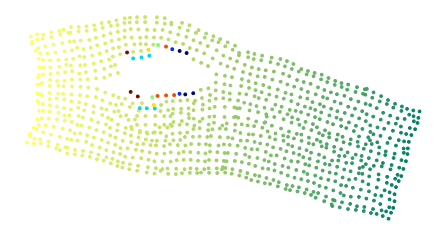

Iteration: 1
error: 0.0027050146861775154
Iteration: 2
error: 0.002614401369282021
Iteration: 3
error: 0.0025604692998936317
Iteration: 4
error: 0.0025240732918123524
Iteration: 5
error: 0.0024992681156692205


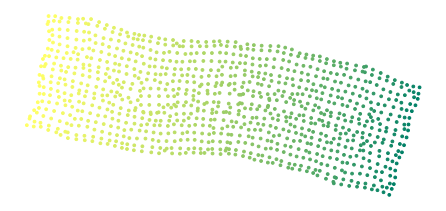

Iteration: 6
error: 0.0024818260556957487
Iteration: 7
error: 0.0024681621576536483
Iteration: 8
error: 0.0024557744379920567
Iteration: 9
error: 0.002445380963817215
Iteration: 10
error: 0.0024362344628683177


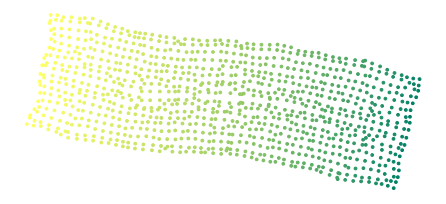

Iteration: 11
error: 0.0024272438738188857
Iteration: 12
error: 0.0024189962084305767
Iteration: 13
error: 0.0024125322887029697
Iteration: 14
error: 0.0024064270853496462
Iteration: 15
error: 0.00240060152942032


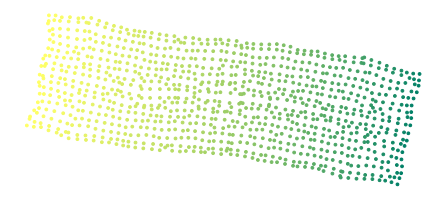

Iteration: 16
error: 0.002395591497553659
Iteration: 17
error: 0.0023913515494351487
Iteration: 18
error: 0.0023878566320274623
Iteration: 19
error: 0.0023843656318967227
Iteration: 20
error: 0.0023816129429657684


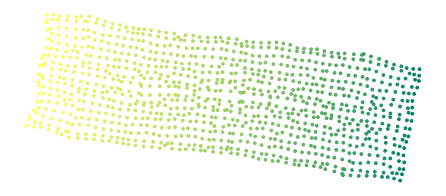

Iteration: 21
error: 0.0023786678450408837
Iteration: 22
error: 0.0023762122810614262
Iteration: 23
error: 0.002374369044524087
Iteration: 24
error: 0.0023726088202929586
Iteration: 25
error: 0.0023710496925257417


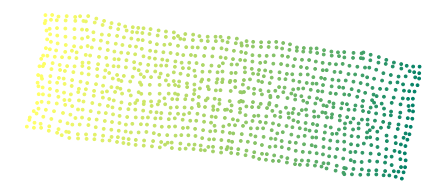

Iteration: 26
error: 0.0023697373994006577
Iteration: 27
error: 0.0023685050573096994
Iteration: 28
error: 0.0023674229001696633
Iteration: 29
error: 0.00236643206830246


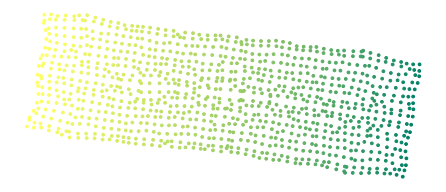

###############
Took 27.1 seconds to refine global embedding.
###############
###############
Took 27.5 seconds to perform step 3: compute global embedding.
###############


In [14]:
%matplotlib inline
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [597]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [598]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

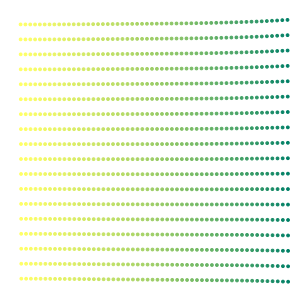

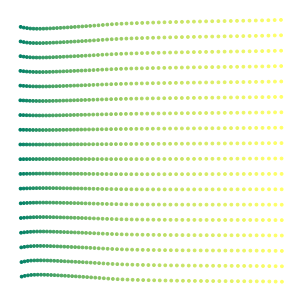

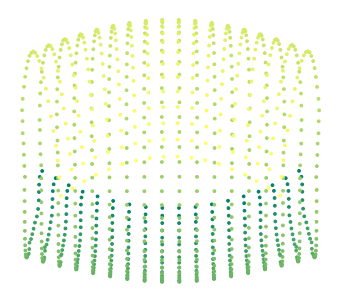

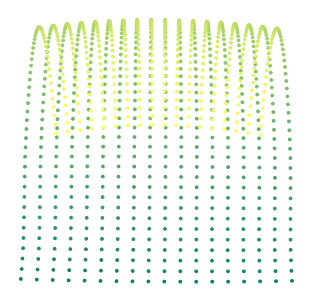

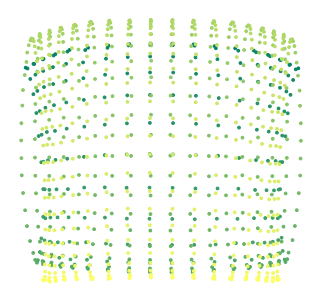

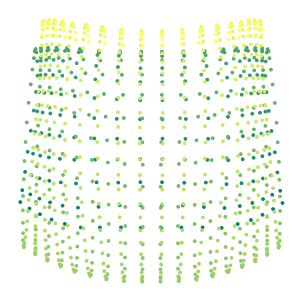

In [599]:
for n_neighbors in [5,10,25,15,75,100]:
    ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=n_neighbors,
                                      n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LTSA_'+str(n_neighbors))

# Laplacian Eigenmaps

In [92]:
from sklearn.manifold import SpectralEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


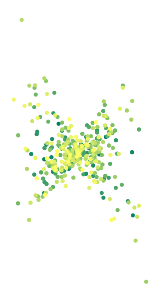

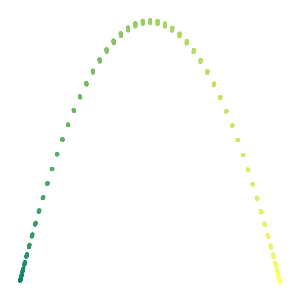

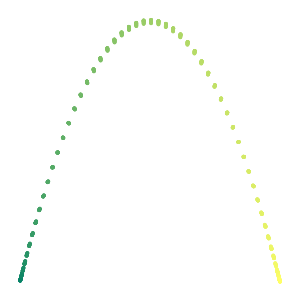

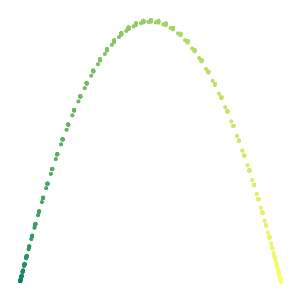

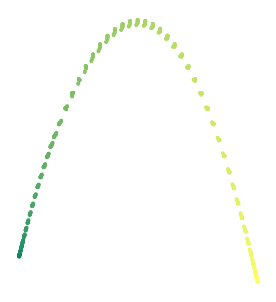

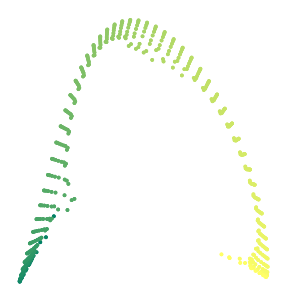

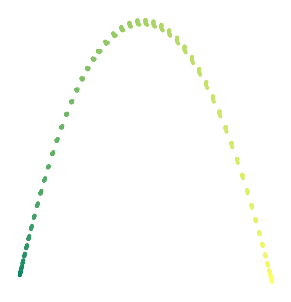

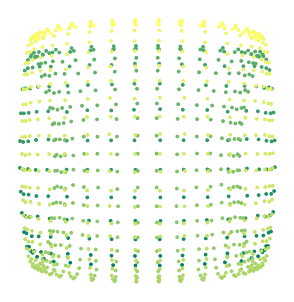

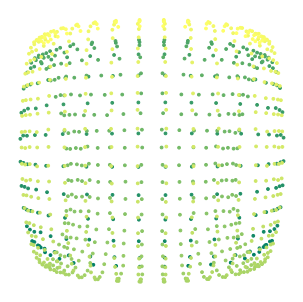

In [95]:
for n_neighbors in [2,3,4,5,10,25,15,75,100]:
    ltsa_obj = SpectralEmbedding(n_neighbors=n_neighbors, n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LE_'+str(n_neighbors))

# UMAP

In [15]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

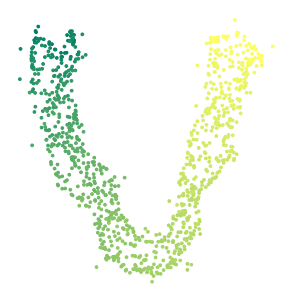

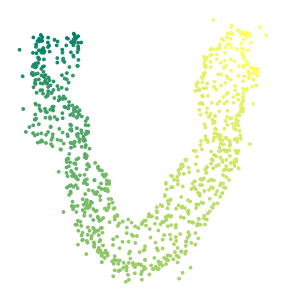

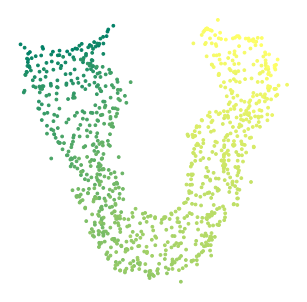

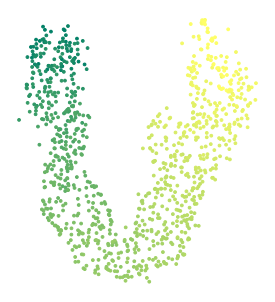

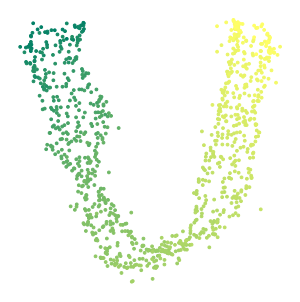

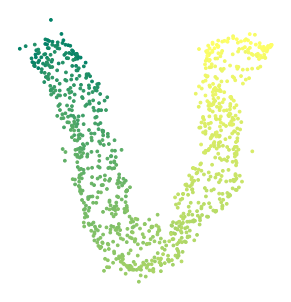

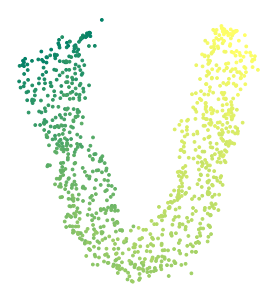

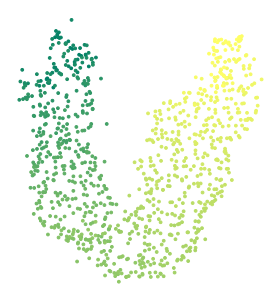

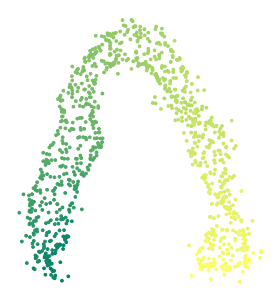

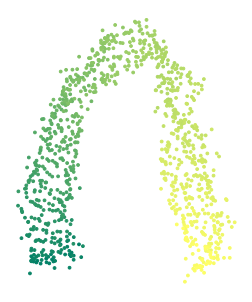

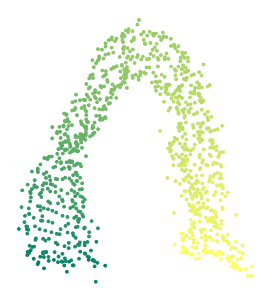

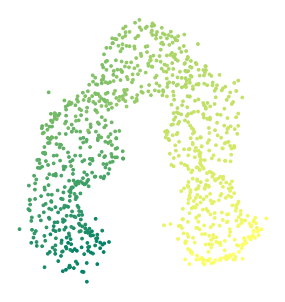

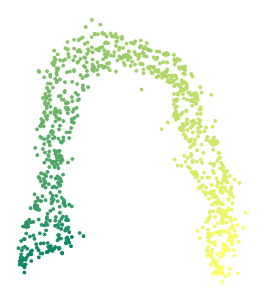

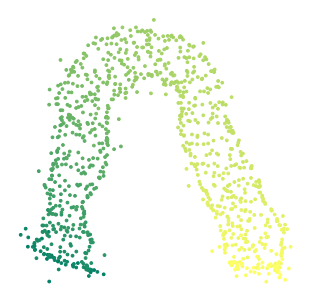

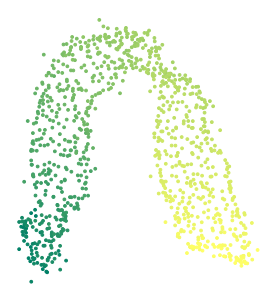

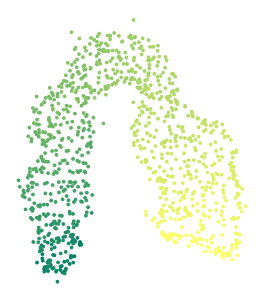

In [18]:
for n_neighbors in [25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=11, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP_'+str(n_neighbors)+'_'+str(min_dist))

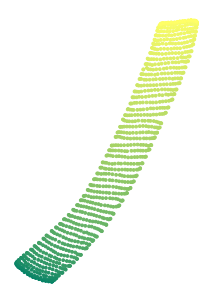

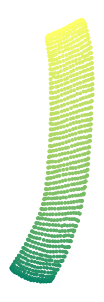

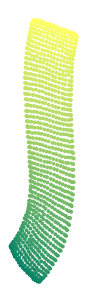

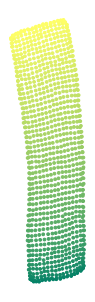

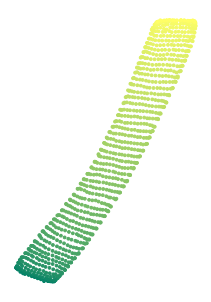

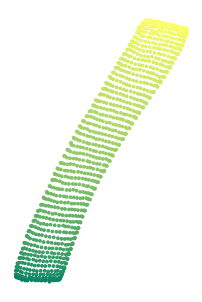

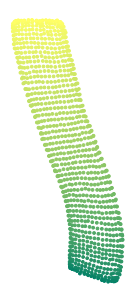

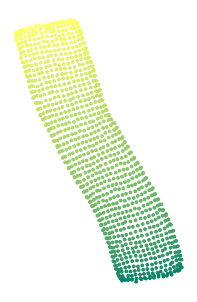

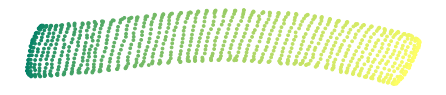

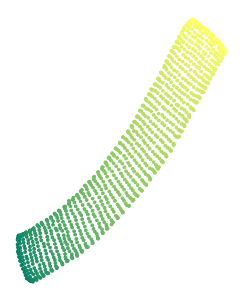

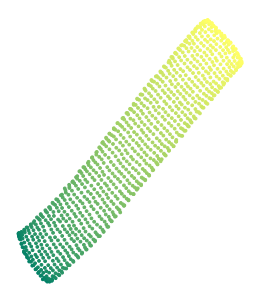

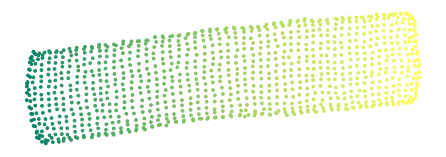

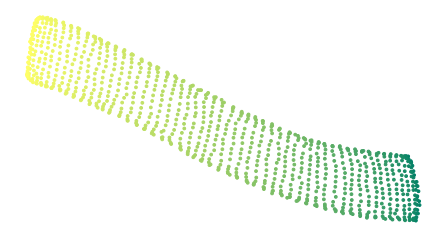

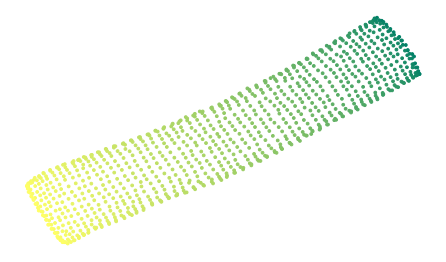

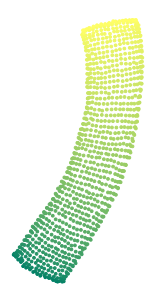

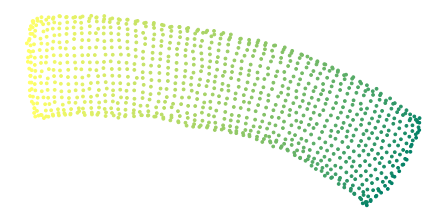

In [601]:
for n_neighbors in [25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=500, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP_'+str(n_neighbors)+'_'+str(min_dist))

# t-SNE

In [602]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

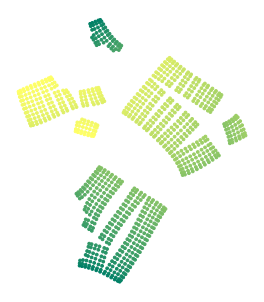

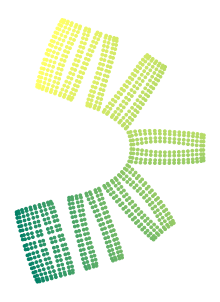

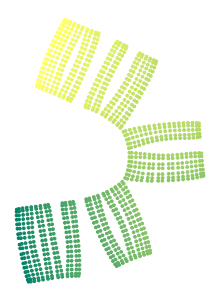

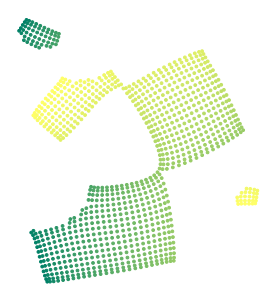

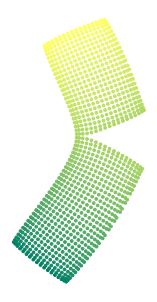

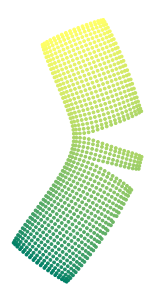

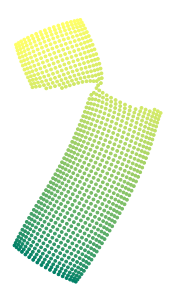

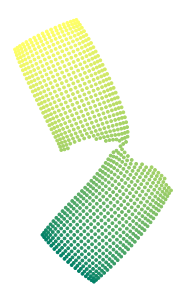

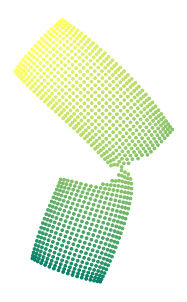

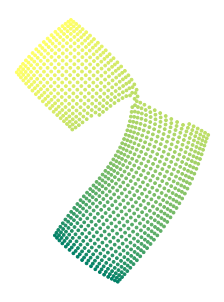

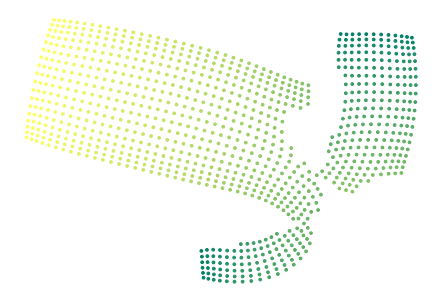

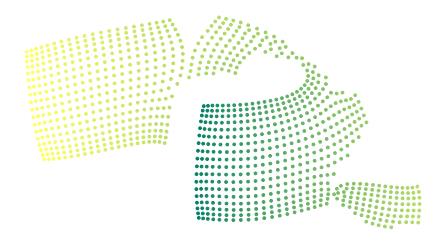

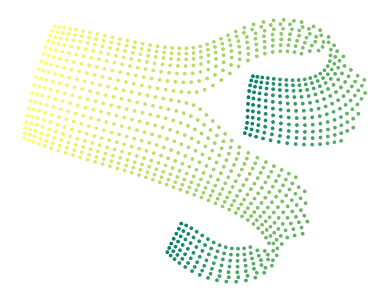

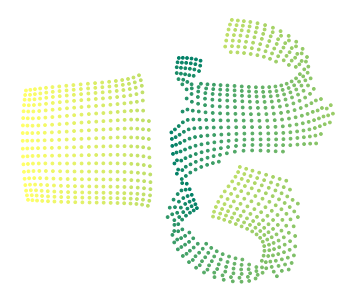

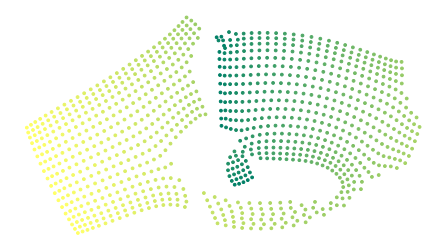

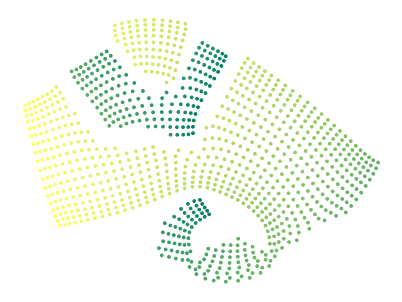

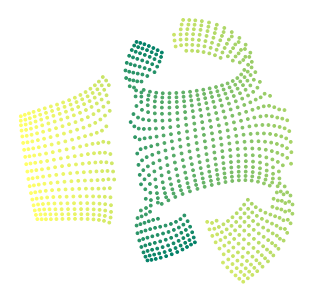

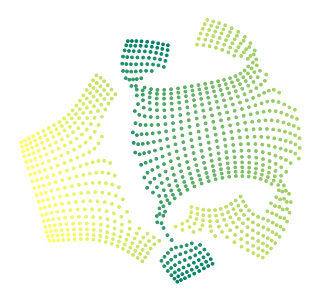

In [603]:
for perplexity in [5,10,30,40,50,60]:
    for ee in [2,4,6]:
        tsne_obj = TSNE(perplexity=perplexity, early_exaggeration=ee, n_components=2,
                        metric='euclidean', random_state=42, n_iter=1000,
                        n_jobs=-1, init='random')
        y_tsne = tsne_obj.fit_transform(X)
        vis.global_embedding(y_tsne, labelsMat[:,0], 'summer', title='t-SNE_'+str(perplexity)+'_'+str(ee))

# RES = 15

In [96]:
RES = 15

In [97]:
save_dir_root = '../data/ldle1/noisyswissroll_sparse'+str(RES)+'/'

In [98]:
X, labelsMat, ddX = datasets.Datasets().noisyswissroll(noise=0, RES=RES)

X.shape =  (280, 3)


# LDLE

In [675]:
ldle_obj = ldle.LDLE(X=X, eta_min=3, k=4, k_tune=1, max_iter0=30, N=25,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

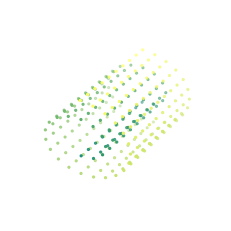

In [676]:
%matplotlib inline
ldle_obj.vis.data(X, labelsMat[:,0], cmap='summer')

Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 70 points processed...
A_k, Atilde_k: 140 points processed...
A_k, Atilde_k: 210 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 70 points processed...
local_param: 140 points processed...
local_param: 210 points processed...
local_param: all 280 points processed...
After iter 1, max distortion is 1.878727
After iter 2, max distortion is 1.676985
After iter 3, max distortion is 1.676985
After iter 4, max distortion is 1.676985
Max local distortion = 1.676985081594733
###############
Took 0.3 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views...
# non-empty views with sz < 2 = 280
#nodes in views with sz < 2 = 280
Remaining #nodes in views with sz < 2 = 0
# non-empty views with sz < 3 = 46
#nodes in views with sz < 3 = 92


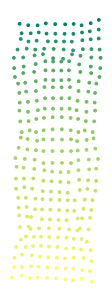

###############
Took 0.1 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.0021460897879083457


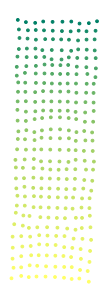

Iteration: 1
error: 0.0021335952579673825
Iteration: 2
error: 0.0021285614145546477
Iteration: 3
error: 0.0021246851991892843
Iteration: 4
error: 0.0021225108924644814
Iteration: 5
error: 0.002121096721901014


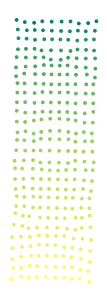

Iteration: 6
error: 0.002120417878087247
Iteration: 7
error: 0.0021197020742098425
Iteration: 8
error: 0.0021192401426949658
Iteration: 9
error: 0.0021188686247971007
Iteration: 10
error: 0.0021186960769048867


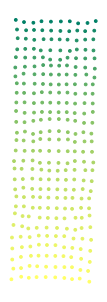

Iteration: 11
error: 0.0021184363265370006
Iteration: 12
error: 0.0021182578281745395
Iteration: 13
error: 0.0021181779588956614
Iteration: 14
error: 0.0021180146265596172
Iteration: 15
error: 0.0021181094458954516


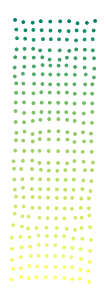

Iteration: 16
error: 0.002117870572018712
Iteration: 17
error: 0.002117824803527653
Iteration: 18
error: 0.002117788319917686
Iteration: 19
error: 0.0021176763554471853
Iteration: 20
error: 0.0021176651607419414


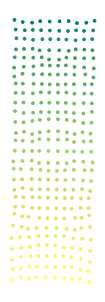

Iteration: 21
error: 0.002117527919296766
Iteration: 22
error: 0.0021174503806684047
Iteration: 23
error: 0.0021174856729328216
Iteration: 24
error: 0.0021174611116953927
Iteration: 25
error: 0.0021174332317790224


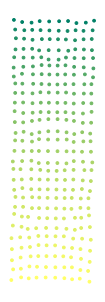

Iteration: 26
error: 0.002117441674521325
Iteration: 27
error: 0.0021173988822257425
Iteration: 28
error: 0.002117340283669577
Iteration: 29
error: 0.0021172783422093978


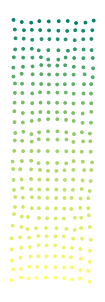

###############
Took 5.2 seconds to refine global embedding.
###############
###############
Took 5.3 seconds to perform step 3: compute global embedding.
###############


In [677]:
%matplotlib inline
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [678]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [624]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

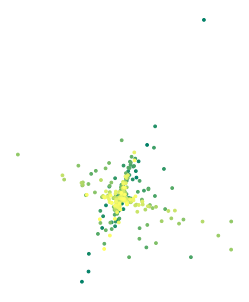

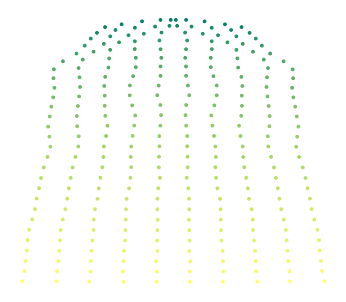

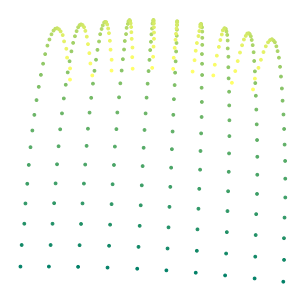

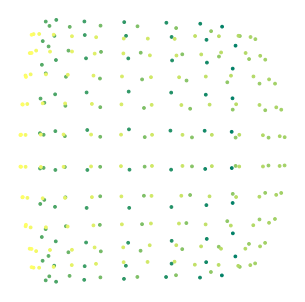

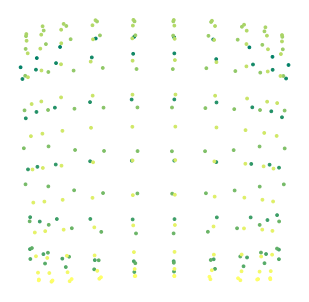

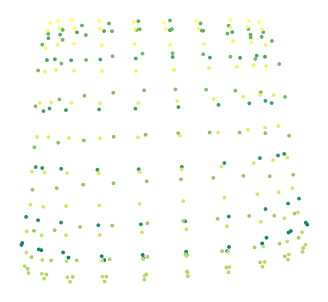

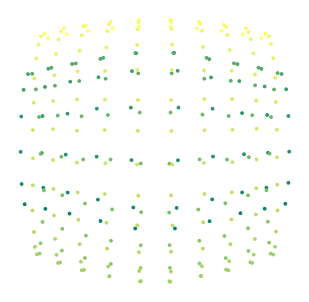

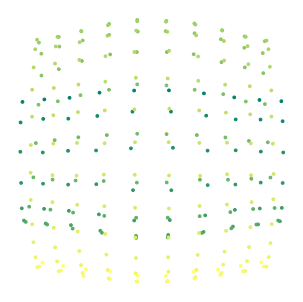

In [625]:
for n_neighbors in [3, 4, 5,10,25,15,75,100]:
    ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=n_neighbors,
                                      n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LTSA_'+str(n_neighbors))

# Laplacian Eigenmaps

In [99]:
from sklearn.manifold import SpectralEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


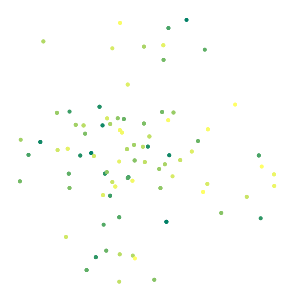

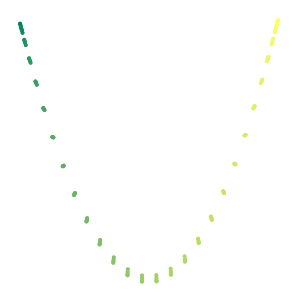

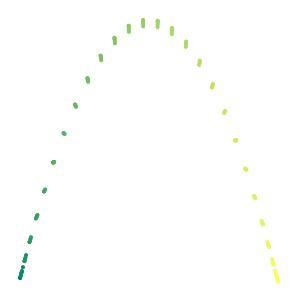

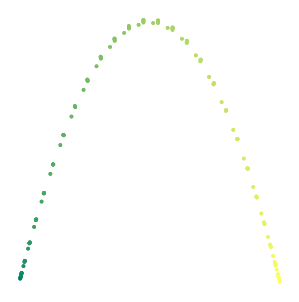

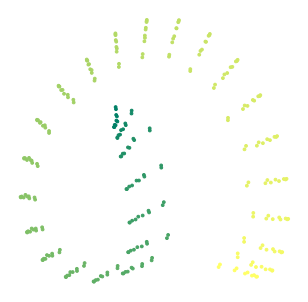

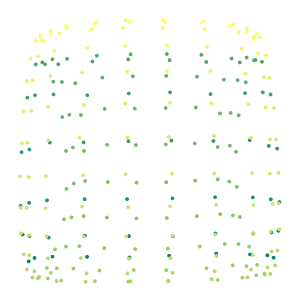

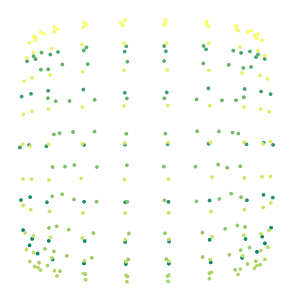

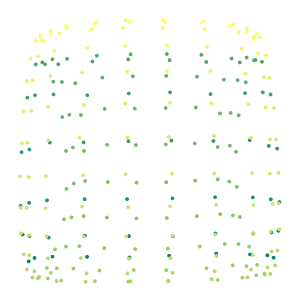

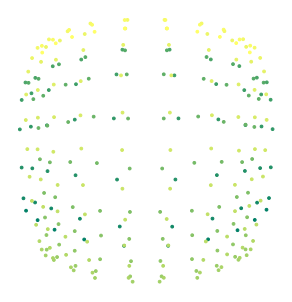

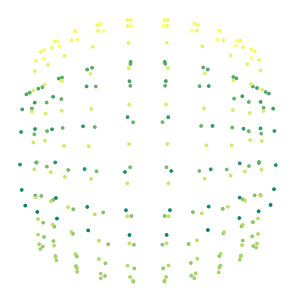

In [101]:
for n_neighbors in [2,3,4,5,10,15,25,15,75,100]:
    ltsa_obj = SpectralEmbedding(n_neighbors=n_neighbors, n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LE_'+str(n_neighbors))

# UMAP

In [626]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

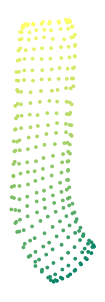

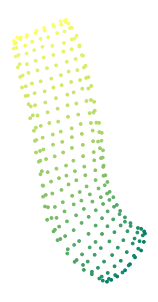

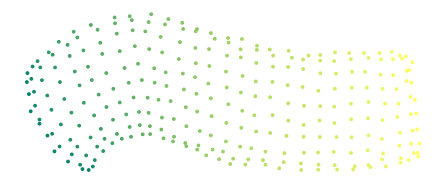

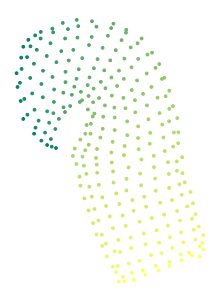

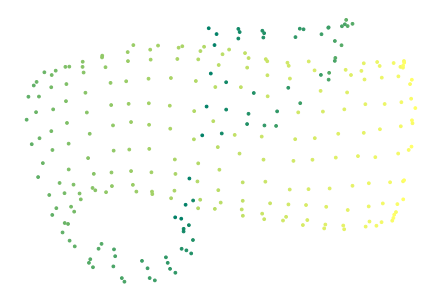

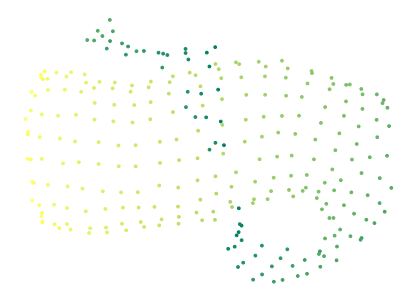

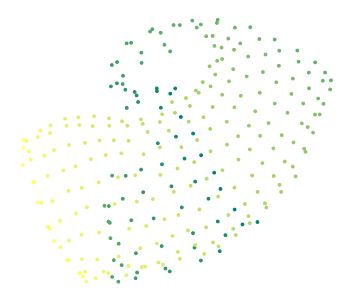

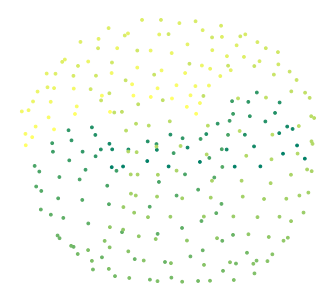

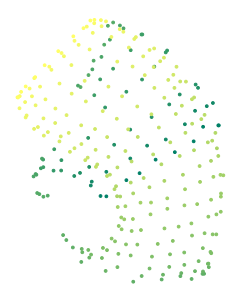

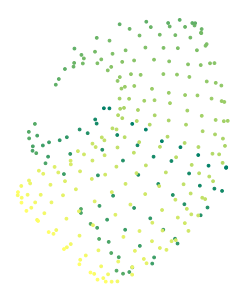

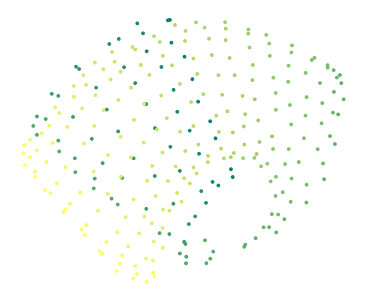

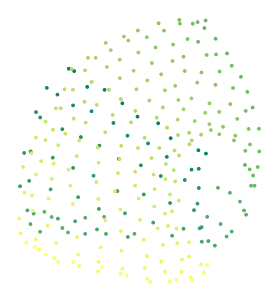

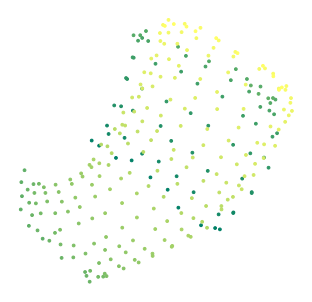

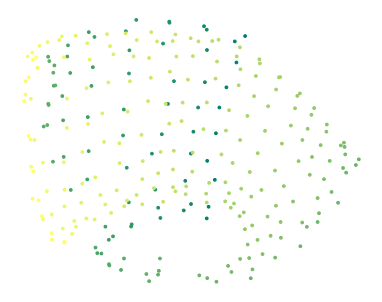

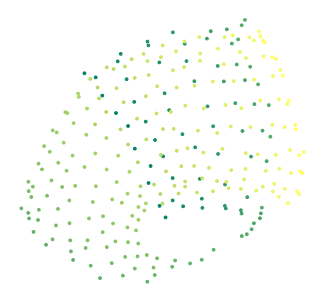

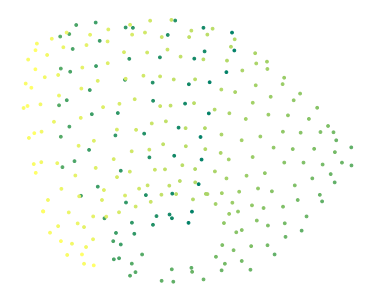

In [627]:
for n_neighbors in [25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=500, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP_'+str(n_neighbors)+'_'+str(min_dist))

# t-SNE

In [628]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

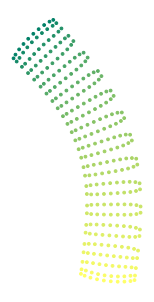

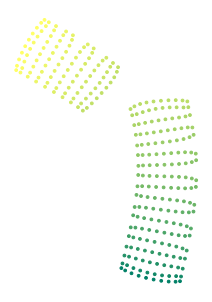

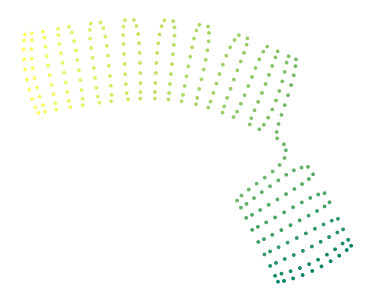

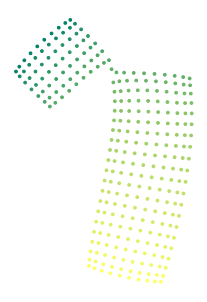

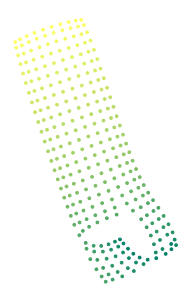

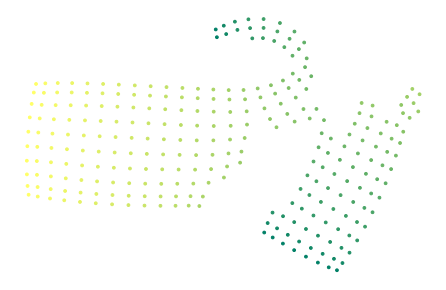

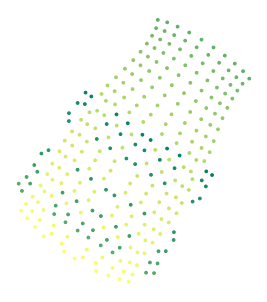

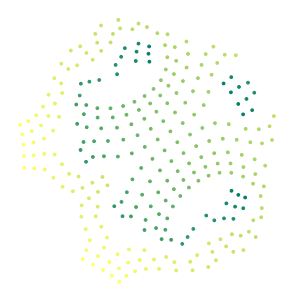

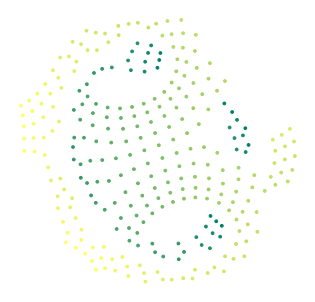

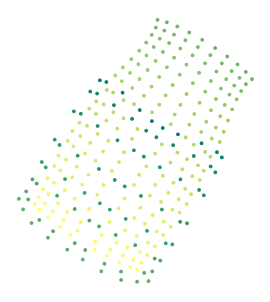

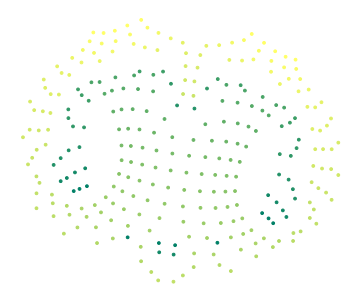

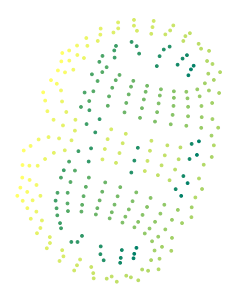

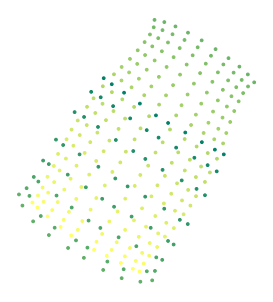

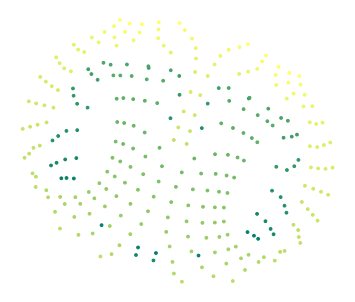

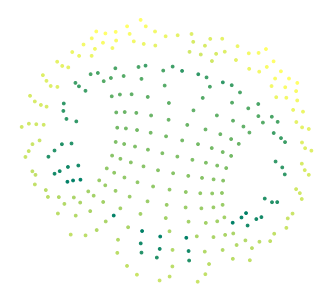

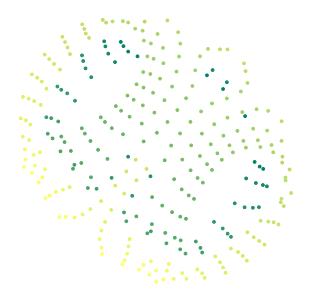

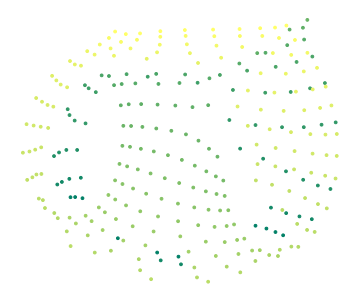

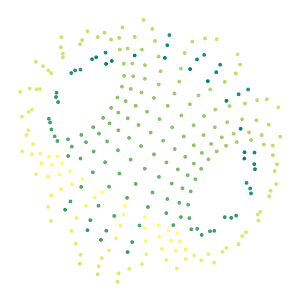

In [629]:
for perplexity in [5,10,30,40,50,60]:
    for ee in [2,4,6]:
        tsne_obj = TSNE(perplexity=perplexity, early_exaggeration=ee, n_components=2,
                        metric='euclidean', random_state=42, n_iter=1000,
                        n_jobs=-1, init='random')
        y_tsne = tsne_obj.fit_transform(X)
        vis.global_embedding(y_tsne, labelsMat[:,0], 'summer', title='t-SNE_'+str(perplexity)+'_'+str(ee))

# RES = 12

In [102]:
RES = 12

In [103]:
save_dir_root = '../data/ldle1/noisyswissroll_sparse'+str(RES)+'/'

In [104]:
X, labelsMat, ddX = datasets.Datasets().noisyswissroll(noise=0, RES=RES)

X.shape =  (184, 3)


# LDLE

In [682]:
ldle_obj = ldle.LDLE(X=X, eta_min=3, k=4, k_tune=1, max_iter0=30, N=25,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

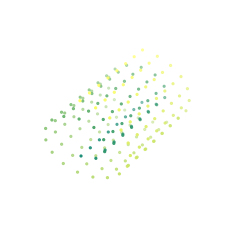

In [683]:
%matplotlib inline
ldle_obj.vis.data(X, labelsMat[:,0], cmap='summer')

Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 46 points processed...
A_k, Atilde_k: 92 points processed...
A_k, Atilde_k: 138 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 46 points processed...
local_param: 92 points processed...
local_param: 138 points processed...
local_param: all 184 points processed...
After iter 1, max distortion is 2.434532
After iter 2, max distortion is 2.367293
After iter 3, max distortion is 2.023222
After iter 4, max distortion is 2.023222
After iter 5, max distortion is 2.023222
Max local distortion = 2.023221517060437
###############
Took 0.2 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views...
# non-empty views with sz < 2 = 184
#nodes in views with sz < 2 = 184
Remaining #nodes in views with sz < 2 = 0
# non-empty views with sz < 3

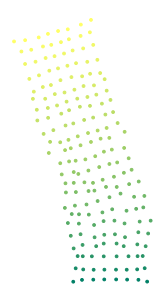

###############
Took 0.1 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.0049345664211901145


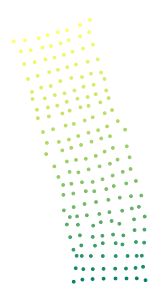

Iteration: 1
error: 0.004920270153886506
Iteration: 2
error: 0.00491302141302551
Iteration: 3
error: 0.004910914731767257
Iteration: 4
error: 0.004908997088842307
Iteration: 5
error: 0.00490792719909657


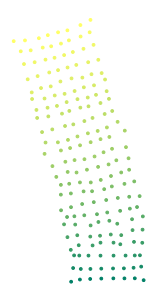

Iteration: 6
error: 0.00490888036897949
Iteration: 7
error: 0.0049071483172401
Iteration: 8
error: 0.004908328054553286
Iteration: 9
error: 0.004907734097419363
Iteration: 10
error: 0.004906818669197797


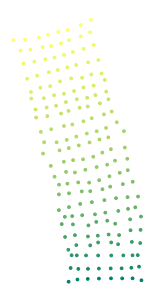

Iteration: 11
error: 0.004905604157858132
Iteration: 12
error: 0.004904460220833503
Iteration: 13
error: 0.004902549460495455
Iteration: 14
error: 0.004900975050311746
Iteration: 15
error: 0.004898739110208827


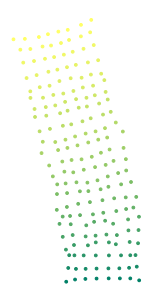

Iteration: 16
error: 0.004897265995373555
Iteration: 17
error: 0.004895234618654408
Iteration: 18
error: 0.004891670304143112
Iteration: 19
error: 0.004890467741270642
Iteration: 20
error: 0.004887721969820353


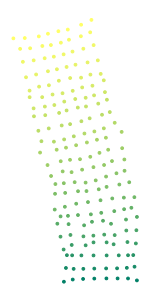

Iteration: 21
error: 0.004885005309742368
Iteration: 22
error: 0.004882467366083651
Iteration: 23
error: 0.004879706317971962
Iteration: 24
error: 0.00487727083197267
Iteration: 25
error: 0.004874198663255642


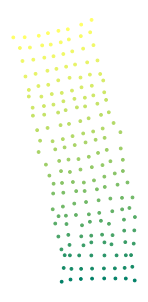

Iteration: 26
error: 0.0048715573221346994
Iteration: 27
error: 0.004868646818514745
Iteration: 28
error: 0.004865619976178062
Iteration: 29
error: 0.0048639895905858615


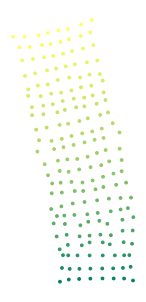

###############
Took 3.3 seconds to refine global embedding.
###############
###############
Took 3.3 seconds to perform step 3: compute global embedding.
###############


In [684]:
%matplotlib inline
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [685]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [637]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

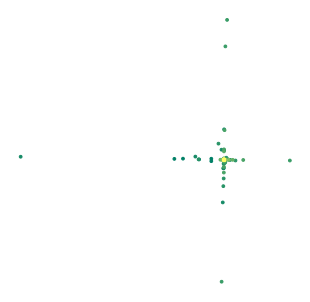

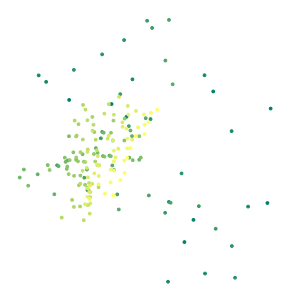

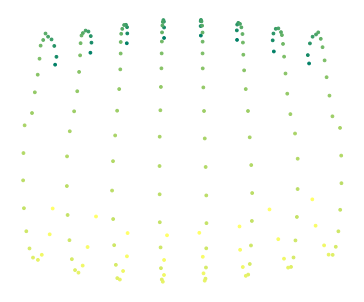

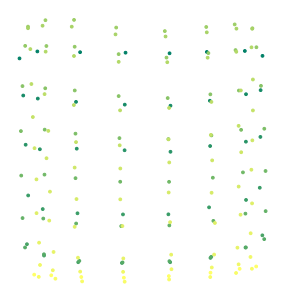

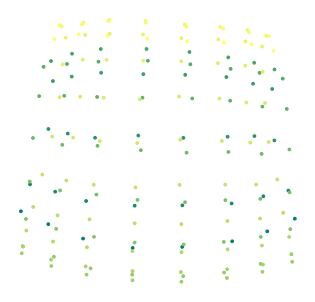

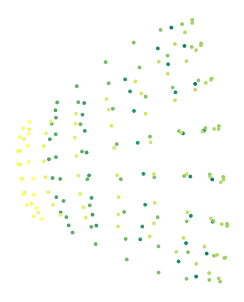

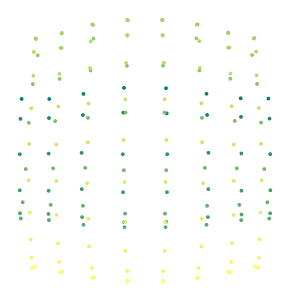

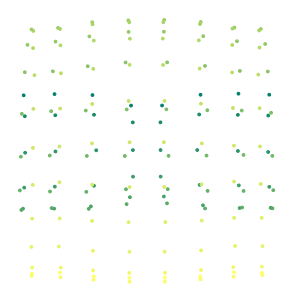

In [638]:
for n_neighbors in [3,4,5,10,25,15,75,100]:
    ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=n_neighbors,
                                      n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LTSA_'+str(n_neighbors))

# Laplacian Eigenmaps

In [107]:
from sklearn.manifold import SpectralEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


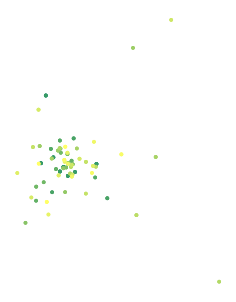

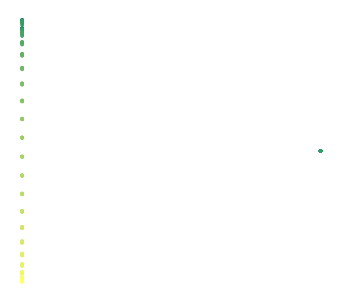

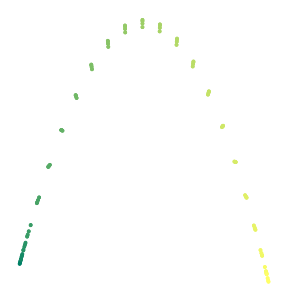

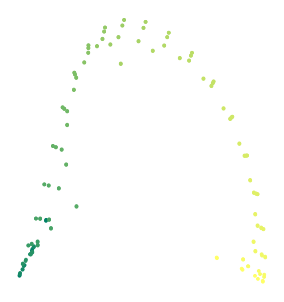

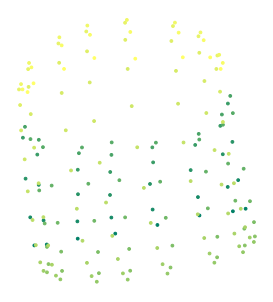

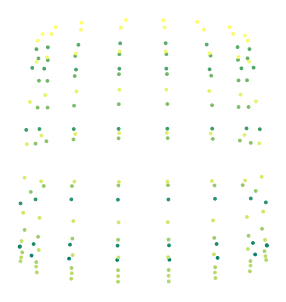

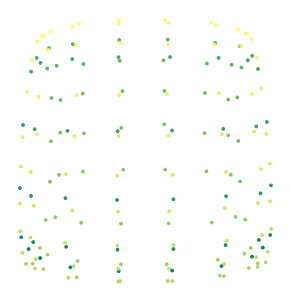

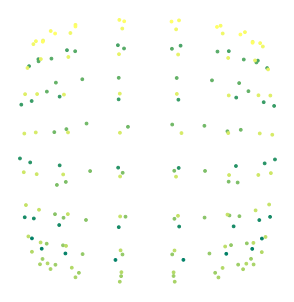

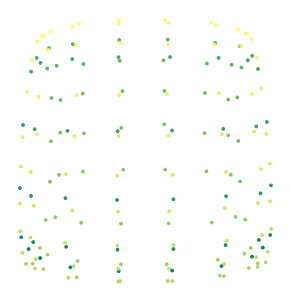

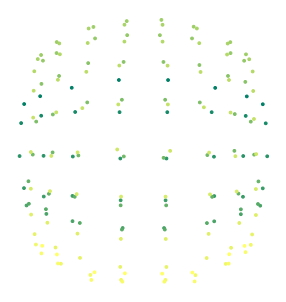

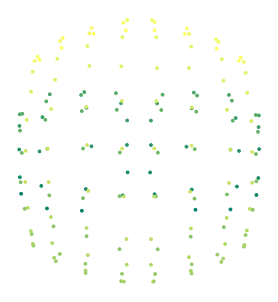

In [109]:
for n_neighbors in [2,3,4,5,8,10,15,25,15,75,100]:
    ltsa_obj = SpectralEmbedding(n_neighbors=n_neighbors, n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LE_'+str(n_neighbors))

# UMAP

In [639]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


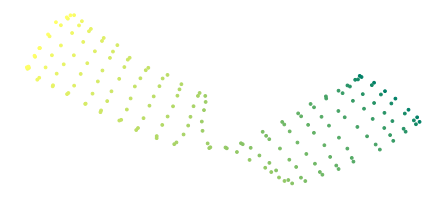

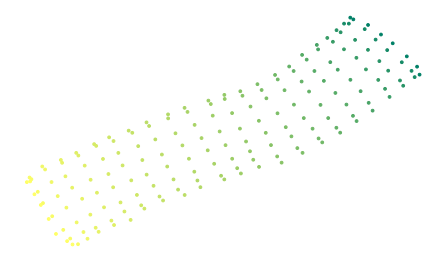

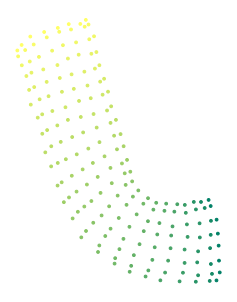

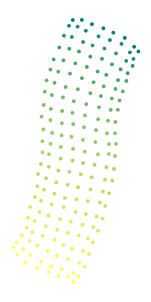

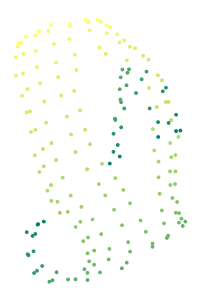

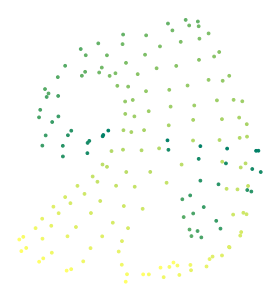

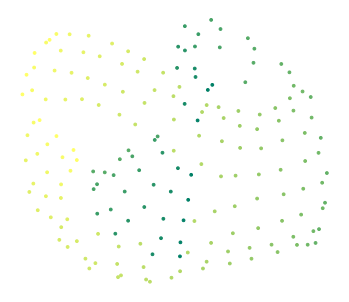

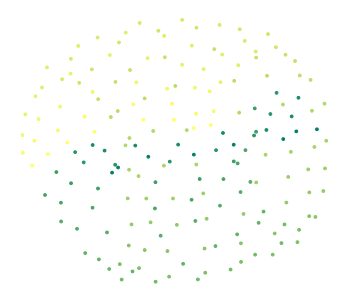

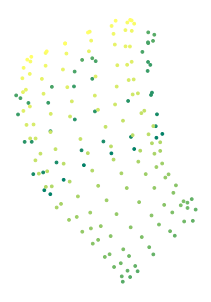

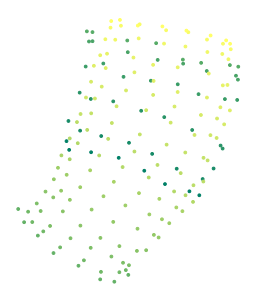

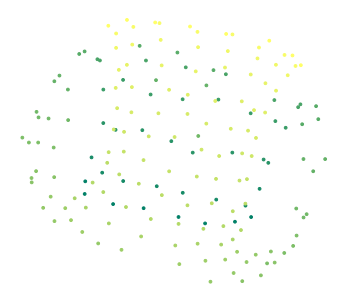

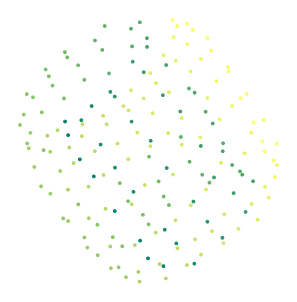

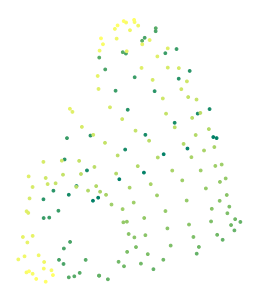

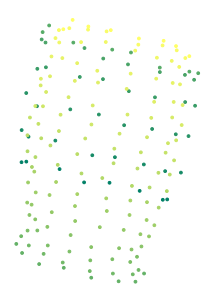

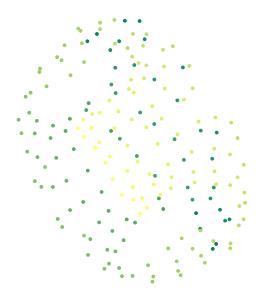

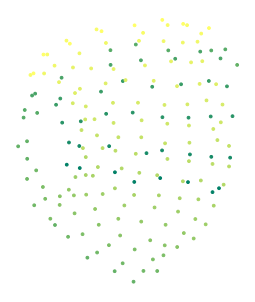

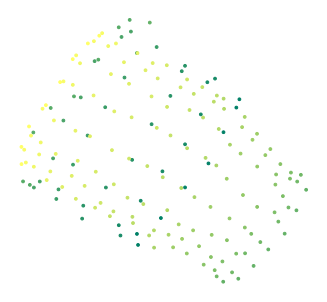

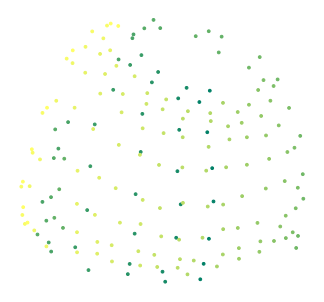

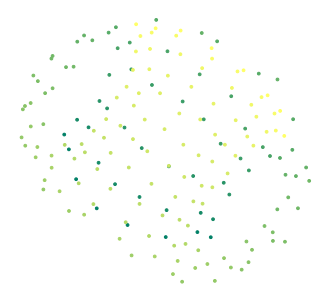

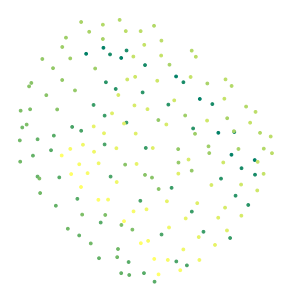

In [640]:
for n_neighbors in [10,25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=500, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP_'+str(n_neighbors)+'_'+str(min_dist))

# t-SNE

In [641]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

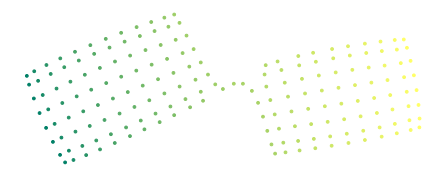

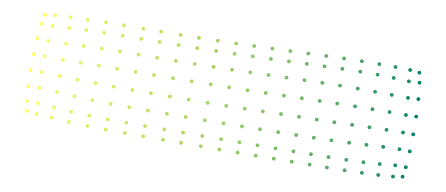

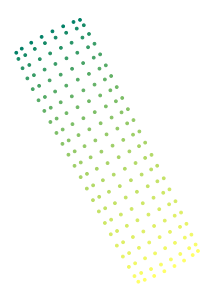

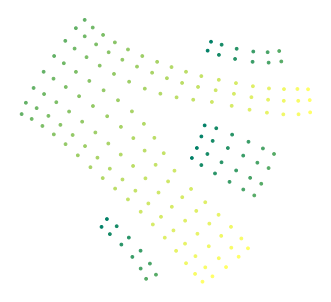

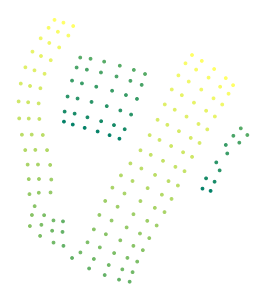

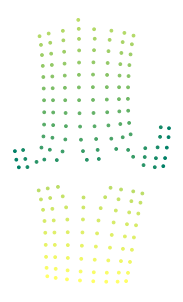

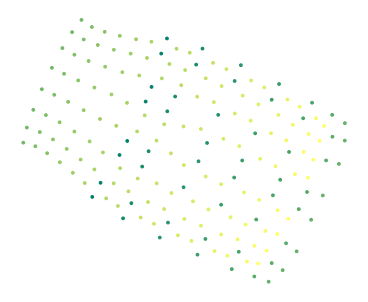

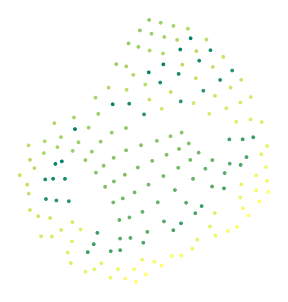

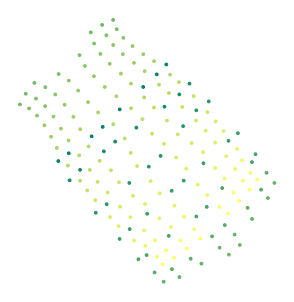

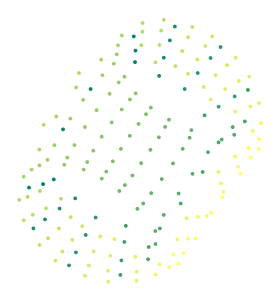

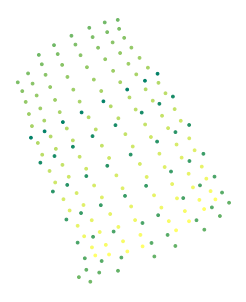

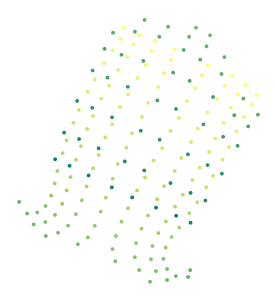

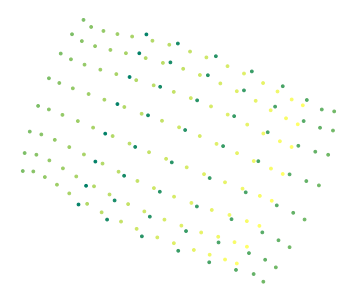

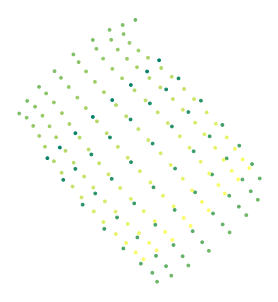

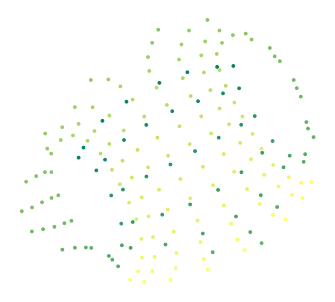

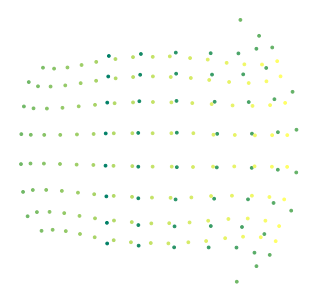

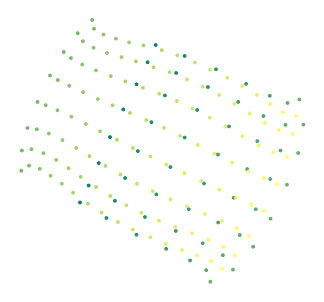

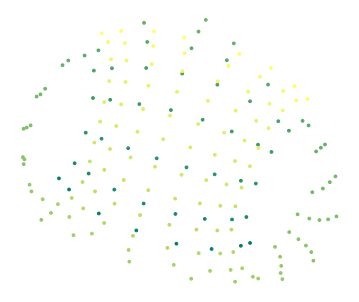

In [642]:
for perplexity in [5,10,30,40,50,60]:
    for ee in [2,4,6]:
        tsne_obj = TSNE(perplexity=perplexity, early_exaggeration=ee, n_components=2,
                        metric='euclidean', random_state=42, n_iter=1000,
                        n_jobs=-1, init='random')
        y_tsne = tsne_obj.fit_transform(X)
        vis.global_embedding(y_tsne, labelsMat[:,0], 'summer', title='t-SNE_'+str(perplexity)+'_'+str(ee))

# RES = 10

In [110]:
RES = 10

In [111]:
save_dir_root = '../data/ldle1/noisyswissroll_sparse'+str(RES)+'/'

In [112]:
X, labelsMat, ddX = datasets.Datasets().noisyswissroll(noise=0, RES=RES)

X.shape =  (133, 3)


# LDLE

In [689]:
ldle_obj = ldle.LDLE(X=X, eta_min=3, k=4, k_tune=1, max_iter0=30, N=25,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

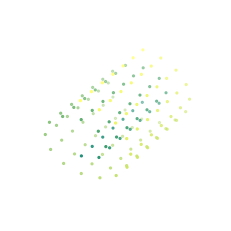

In [690]:
%matplotlib inline
ldle_obj.vis.data(X, labelsMat[:,0], cmap='summer')

Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 33 points processed...
A_k, Atilde_k: 66 points processed...
A_k, Atilde_k: 99 points processed...
A_k, Atilde_k: 132 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 33 points processed...
local_param: 66 points processed...
local_param: 99 points processed...
local_param: 132 points processed...
local_param: all 133 points processed...
After iter 1, max distortion is 4.801099
After iter 2, max distortion is 3.811436
After iter 3, max distortion is 3.811436
After iter 4, max distortion is 3.811436
After iter 5, max distortion is 3.811436
Max local distortion = 3.811436410990227
###############
Took 0.1 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views...
# non-empty views with sz < 2 = 133
#nodes in views with sz < 2 = 1

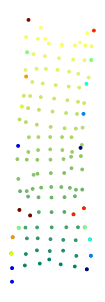

###############
Took 0.1 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.009797143306671939


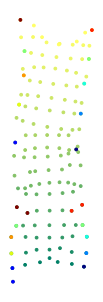

Iteration: 1
error: 0.009824639001328742
Iteration: 2
error: 0.00980721012297085
Iteration: 3
error: 0.009775090660958894
Iteration: 4
error: 0.009755585788762023
Iteration: 5
error: 0.00973002071240637


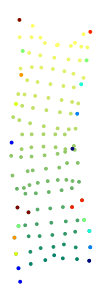

Iteration: 6
error: 0.009701055066112364
Iteration: 7
error: 0.009674566828572899
Iteration: 8
error: 0.009652357023127696
Iteration: 9
error: 0.00963697062896167
Iteration: 10
error: 0.009622007843364774


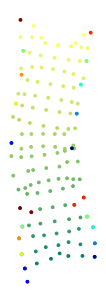

Iteration: 11
error: 0.00960802322935877
Iteration: 12
error: 0.009596669816168498
Iteration: 13
error: 0.00958345312485085
Iteration: 14
error: 0.009571307429609493
Iteration: 15
error: 0.00956388038486946


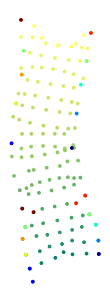

Iteration: 16
error: 0.009558179917332823
Iteration: 17
error: 0.009552638575384262
Iteration: 18
error: 0.009547236507783387
Iteration: 19
error: 0.009543791380302306
Iteration: 20
error: 0.009538181170228482


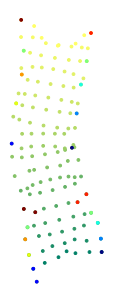

Iteration: 21
error: 0.009534129106938606
Iteration: 22
error: 0.009530910478695339
Iteration: 23
error: 0.009528866153705219
Iteration: 24
error: 0.009526708013542586
Iteration: 25
error: 0.009524141435470028


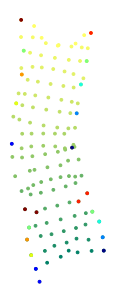

Iteration: 26
error: 0.00952205243887135
Iteration: 27
error: 0.009521029636414739
Iteration: 28
error: 0.009518833142222204
Iteration: 29
error: 0.009517579320466882


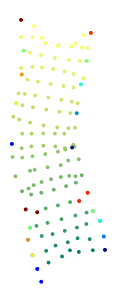

###############
Took 1.9 seconds to refine global embedding.
###############
###############
Took 2.0 seconds to perform step 3: compute global embedding.
###############


In [691]:
%matplotlib inline
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [693]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [650]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

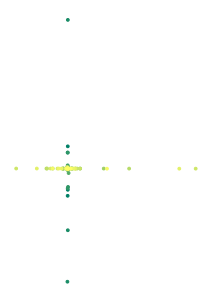

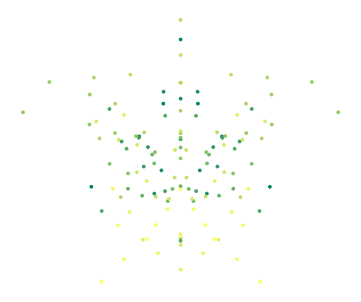

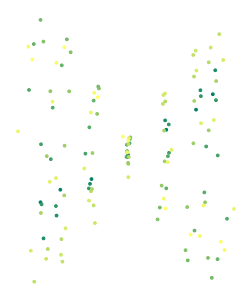

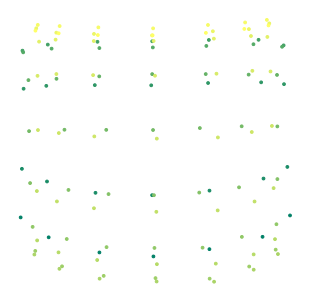

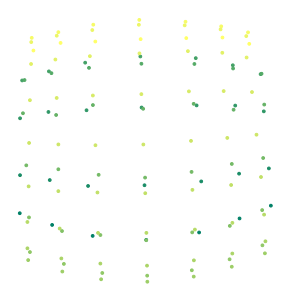

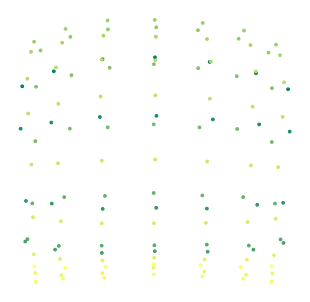

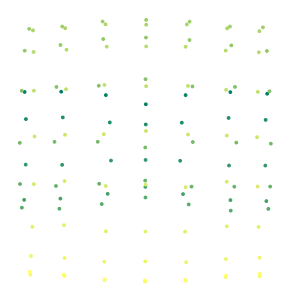

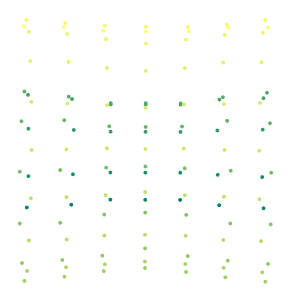

In [651]:
for n_neighbors in [3,4,5,10,25,15,75,100]:
    ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=n_neighbors,
                                      n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LTSA_'+str(n_neighbors))

# Laplacian Eigenmaps

In [113]:
from sklearn.manifold import SpectralEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


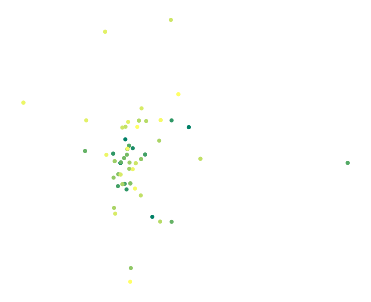

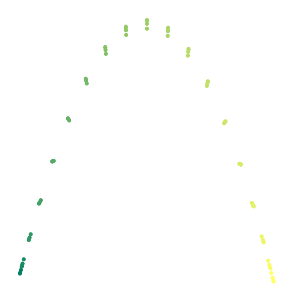

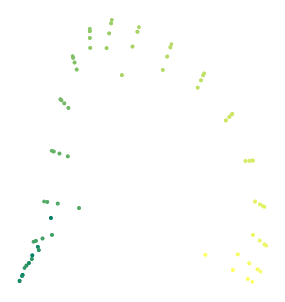

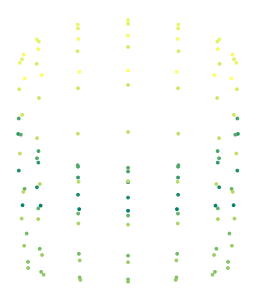

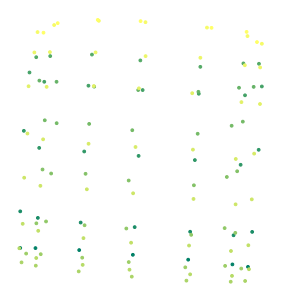

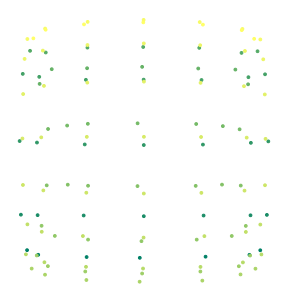

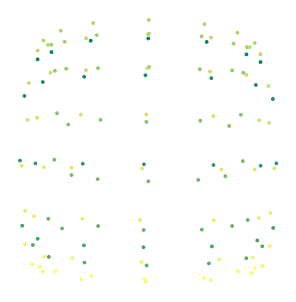

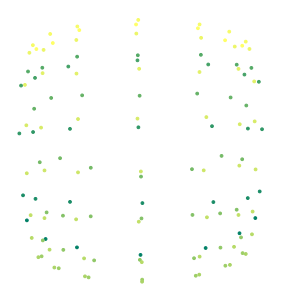

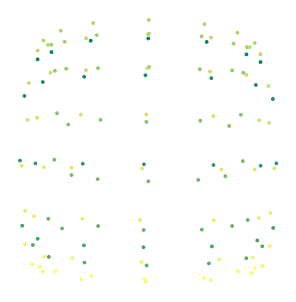

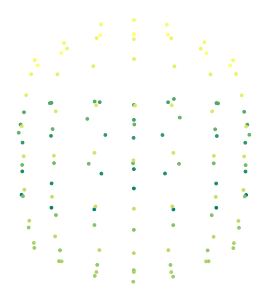

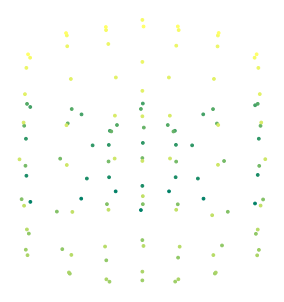

In [114]:
for n_neighbors in [2,3,4,5,8,10,15,25,15,75,100]:
    ltsa_obj = SpectralEmbedding(n_neighbors=n_neighbors, n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LE_'+str(n_neighbors))

# UMAP

In [652]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
../visualize.py:1339: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[

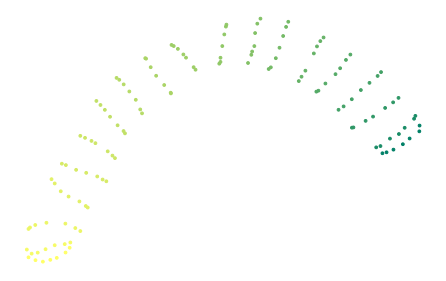

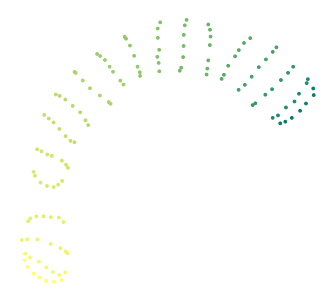

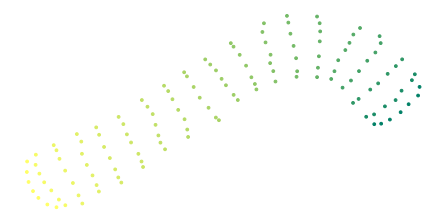

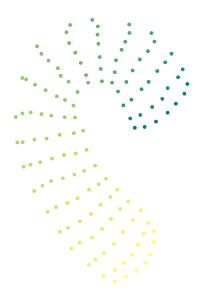

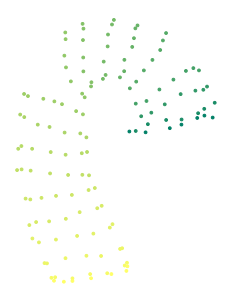

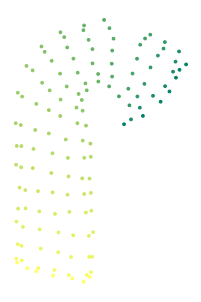

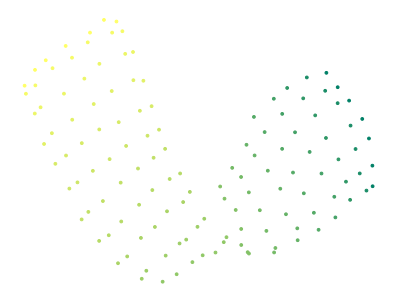

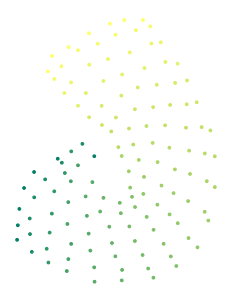

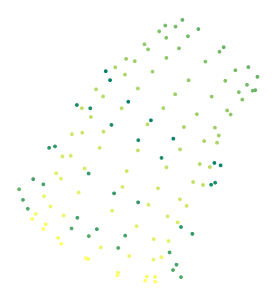

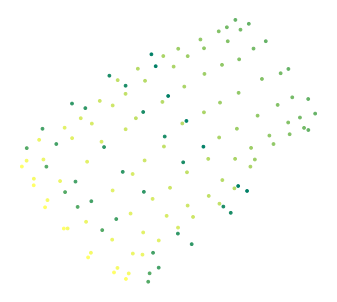

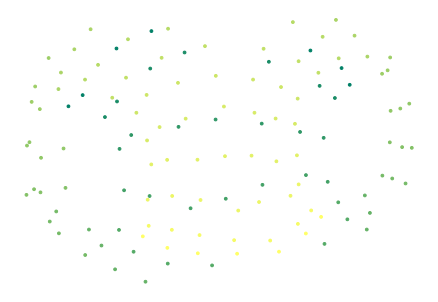

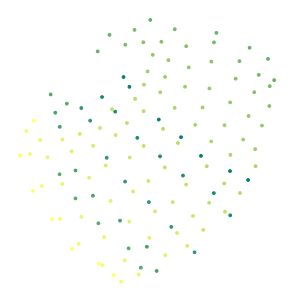

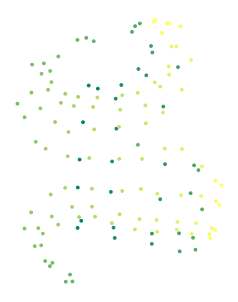

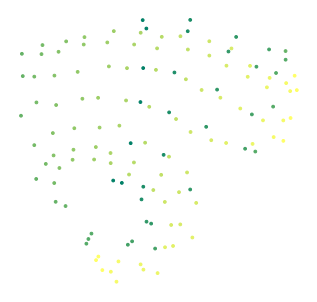

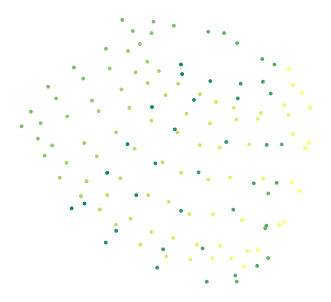

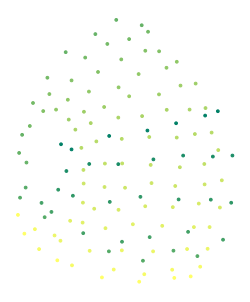

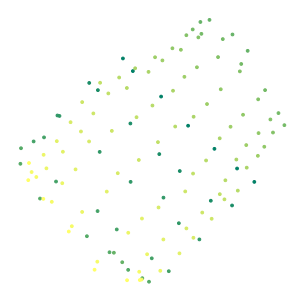

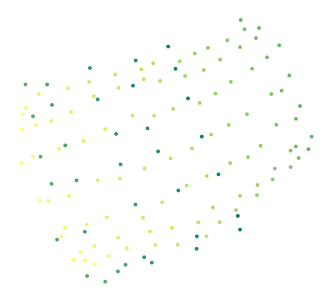

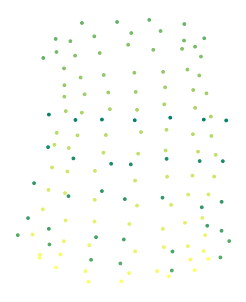

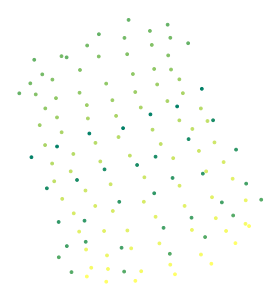

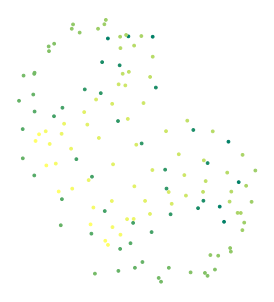

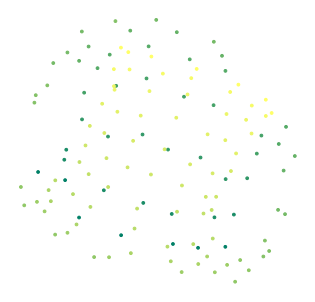

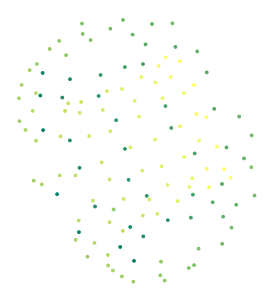

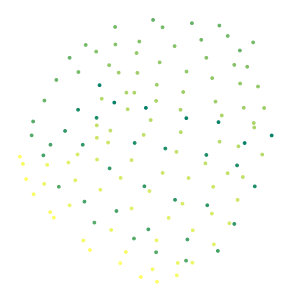

In [653]:
for n_neighbors in [5,10,25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=500, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP_'+str(n_neighbors)+'_'+str(min_dist))

# t-SNE

In [697]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

../visualize.py:1339: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


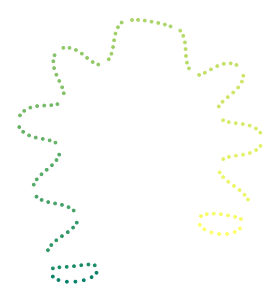

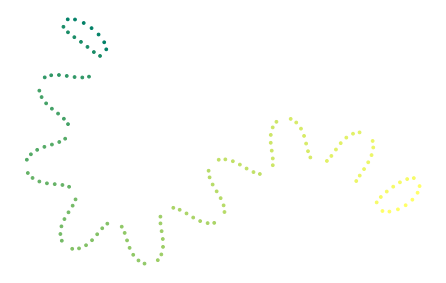

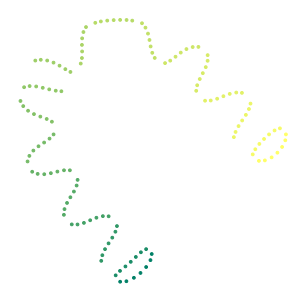

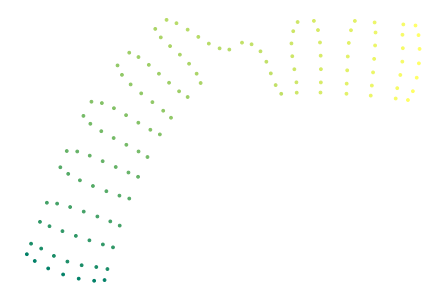

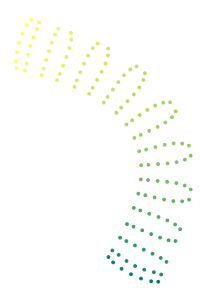

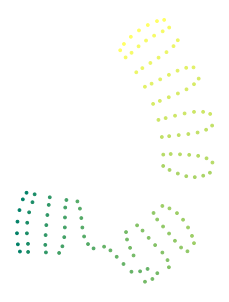

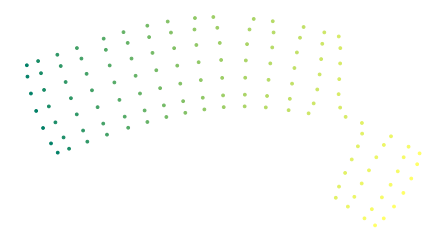

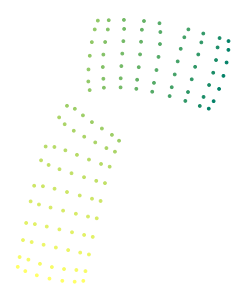

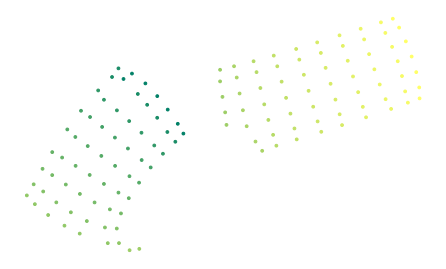

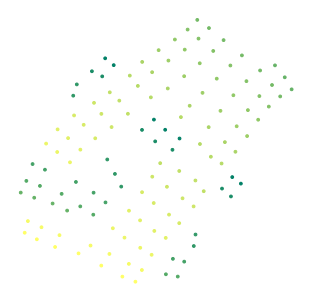

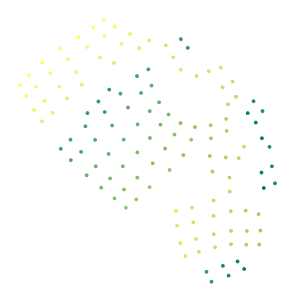

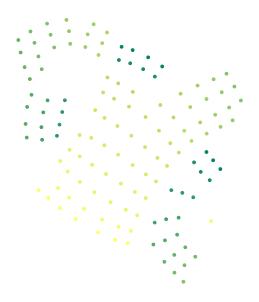

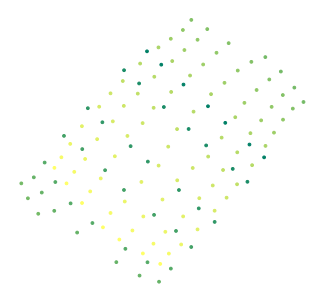

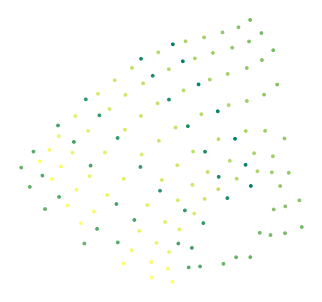

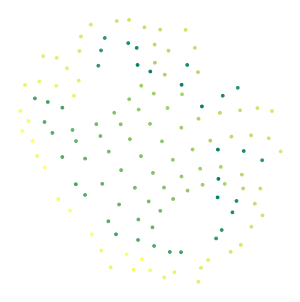

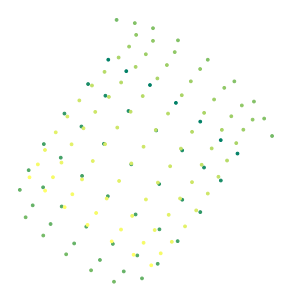

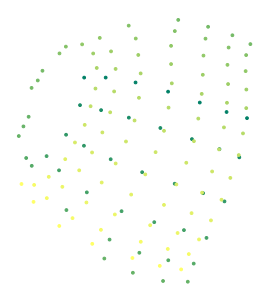

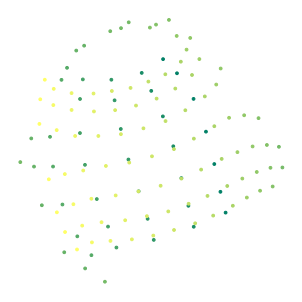

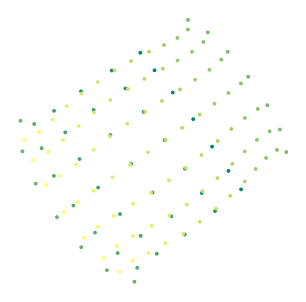

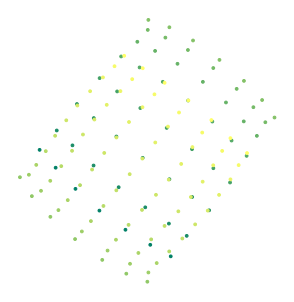

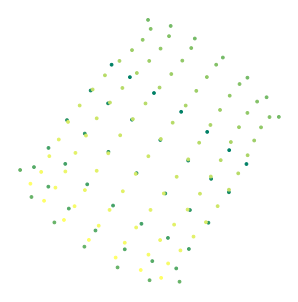

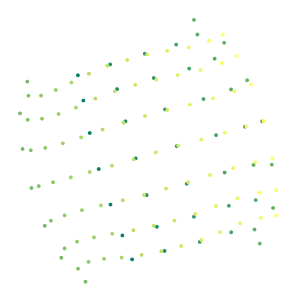

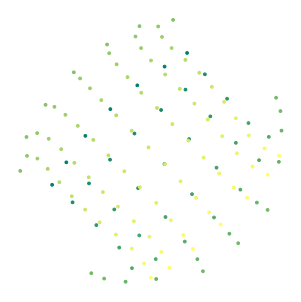

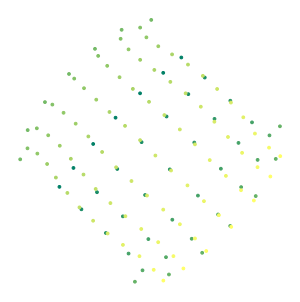

In [699]:
for perplexity in [3,4,5,10,30,40,50,60]:
    for ee in [2,4,6]:
        tsne_obj = TSNE(perplexity=perplexity, early_exaggeration=ee, n_components=2,
                        metric='euclidean', random_state=42, n_iter=1000,
                        n_jobs=-1, init='random')
        y_tsne = tsne_obj.fit_transform(X)
        vis.global_embedding(y_tsne, labelsMat[:,0], 'summer', title='t-SNE_'+str(perplexity)+'_'+str(ee))

# RES = 7

In [115]:
RES = 7

In [116]:
save_dir_root = '../data/ldle1/noisyswissroll_sparse'+str(RES)+'/'

In [117]:
X, labelsMat, ddX = datasets.Datasets().noisyswissroll(noise=0, RES=RES)

X.shape =  (70, 3)


# LDLE

In [84]:
ldle_obj = ldle.LDLE(X=X, eta_min=2, k=3, k_tune=1, k_nn=12, max_iter0=30, N=10, compute_ldle_bf=True,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

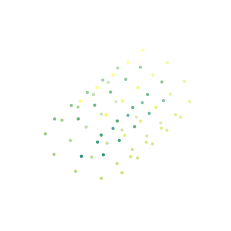

In [85]:
%matplotlib inline
ldle_obj.vis.data(X, labelsMat[:,0], cmap='summer')

Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 17 points processed...
A_k, Atilde_k: 34 points processed...
A_k, Atilde_k: 51 points processed...
A_k, Atilde_k: 68 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
Using brute force
local_param: 0 points processed...
local_param: 17 points processed...
local_param: 34 points processed...
local_param: 51 points processed...
local_param: 68 points processed...
local_param: all 70 points processed...
After iter 1, max distortion is 2.877184
After iter 2, max distortion is 2.877184
After iter 3, max distortion is 2.877184
Max local distortion = 2.8771838407991583
###############
Took 0.4 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views...
# non-empty views with sz < 2 = 70
#nodes in views with sz < 2 = 70
Remaining #nodes in views with sz < 2 = 0
After clustering, max d

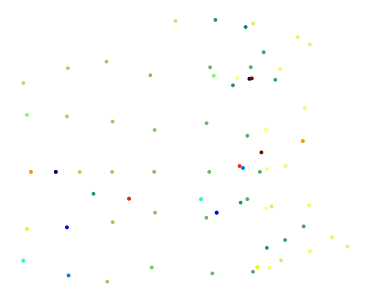

###############
Took 0.1 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.07160350188672325


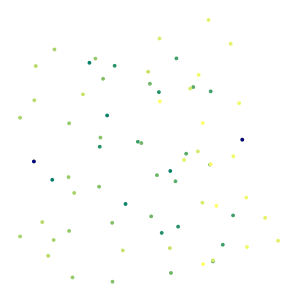

Iteration: 1
error: 0.05872624043496588
Iteration: 2
error: 0.05771236932776587
Iteration: 3
error: 0.05291090444532993
Iteration: 4
error: 0.05241097643588413
Iteration: 5
error: 0.05223987366877657


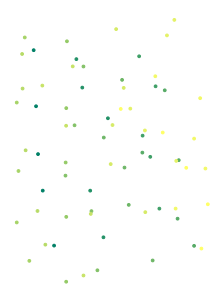

Iteration: 6
error: 0.05206844285900662
Iteration: 7
error: 0.05196220220100435
Iteration: 8
error: 0.051885591665702314
Iteration: 9
error: 0.05181916415105567
Iteration: 10
error: 0.05176366121028575


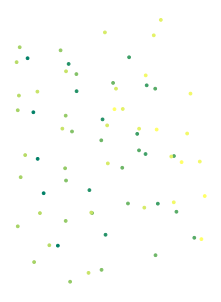

Iteration: 11
error: 0.051720522232391625
Iteration: 12
error: 0.05178518146833057
Iteration: 13
error: 0.05175915292801111
Iteration: 14
error: 0.05174298980562199
Iteration: 15
error: 0.05172591951650781


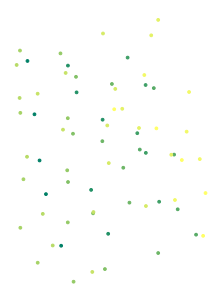

Iteration: 16
error: 0.051708192741263884
Iteration: 17
error: 0.05169891691024486
Iteration: 18
error: 0.05168841666266014
Iteration: 19
error: 0.0516812629577103
Iteration: 20
error: 0.0516744615921282


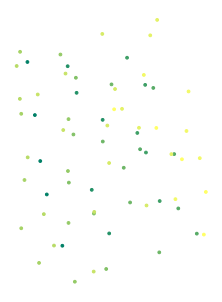

Iteration: 21
error: 0.05167044239932943
Iteration: 22
error: 0.05166599092798473
Iteration: 23
error: 0.051662771286849554
Iteration: 24
error: 0.05166018766064209
Iteration: 25
error: 0.05165809450642438


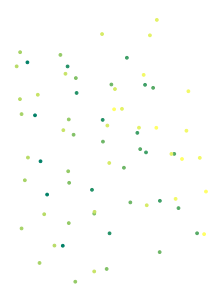

Iteration: 26
error: 0.05165585432213737
Iteration: 27
error: 0.051654907711665685
Iteration: 28
error: 0.051653953093779174
Iteration: 29
error: 0.051652824753879556


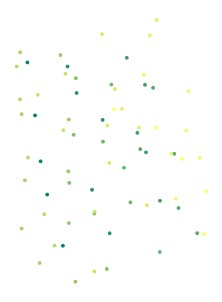

###############
Took 2.5 seconds to refine global embedding.
###############
###############
Took 2.6 seconds to perform step 3: compute global embedding.
###############


In [86]:
%matplotlib inline
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [764]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [118]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 70, n_neighbors = 75

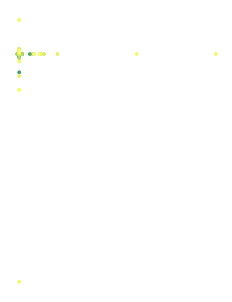

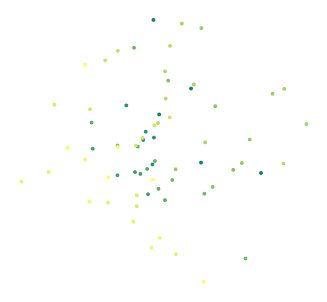

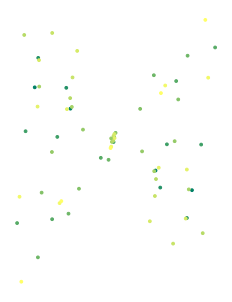

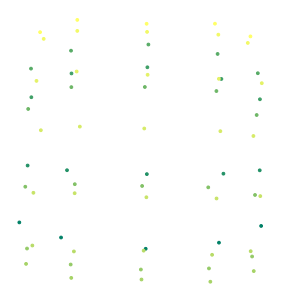

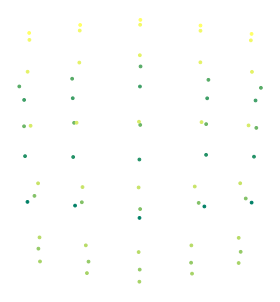

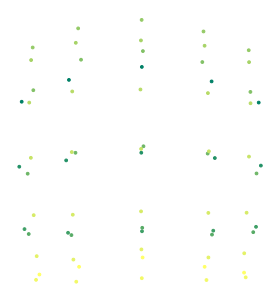

In [119]:
for n_neighbors in [3,4,5,10,25,15,75,100]:
    ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=n_neighbors,
                                      n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LTSA_'+str(n_neighbors))

# Laplacian Eigenmaps

In [120]:
from sklearn.manifold import SpectralEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 70, n_neighbors = 75

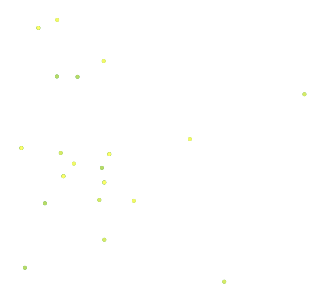

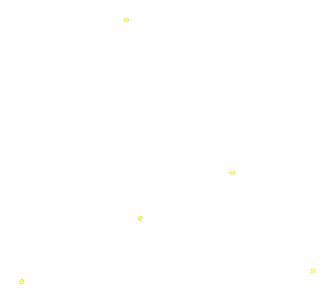

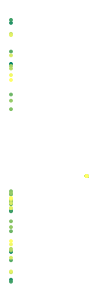

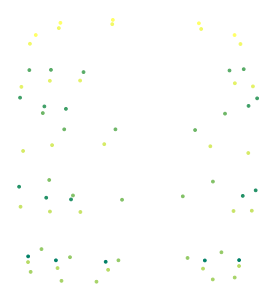

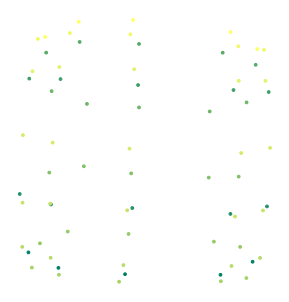

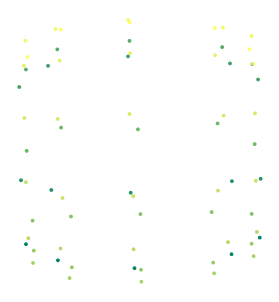

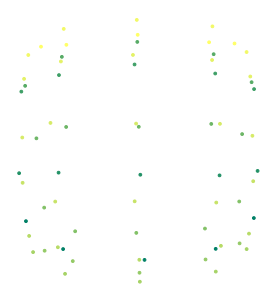

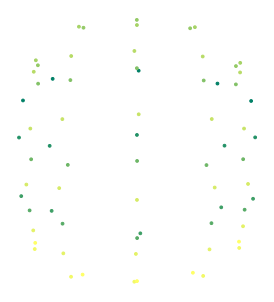

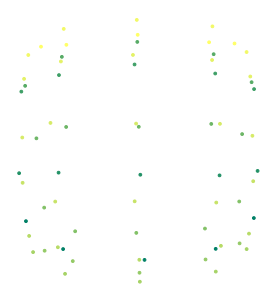

In [121]:
for n_neighbors in [2,3,4,5,8,10,15,25,15,75,100]:
    ltsa_obj = SpectralEmbedding(n_neighbors=n_neighbors, n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LE_'+str(n_neighbors))

# UMAP

In [767]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
../visualize.py:1339: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[

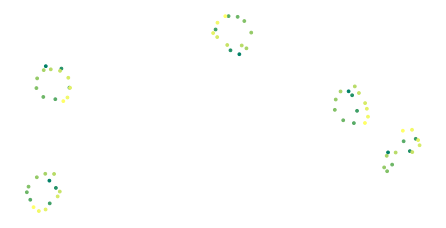

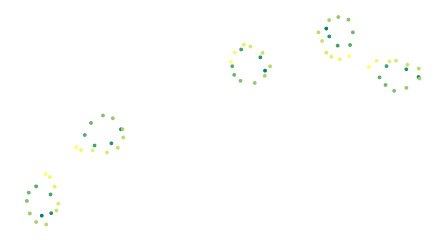

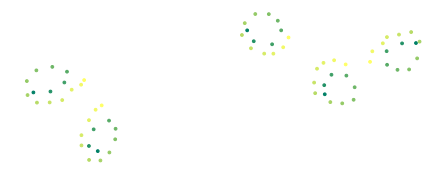

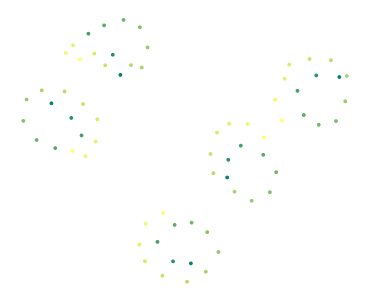

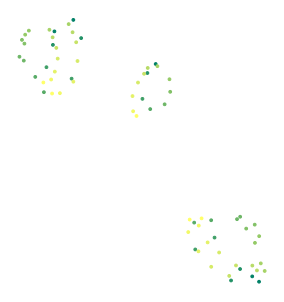

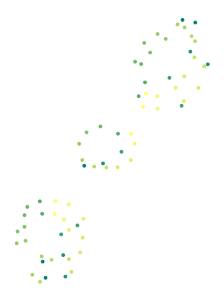

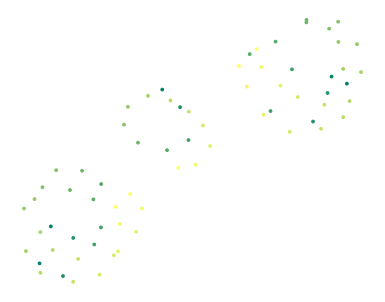

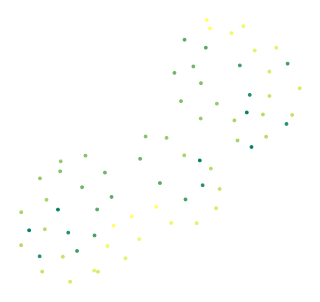

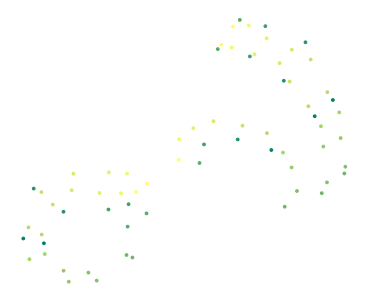

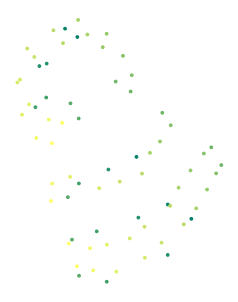

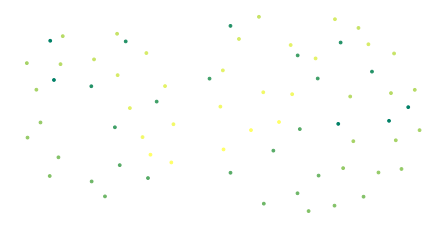

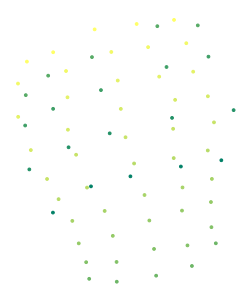

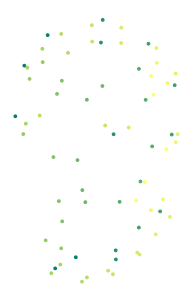

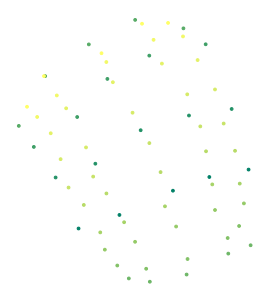

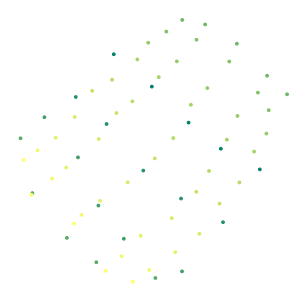

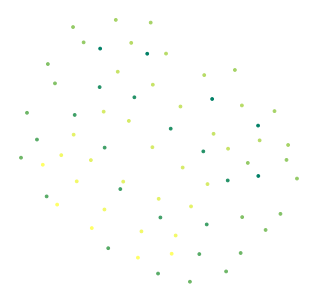

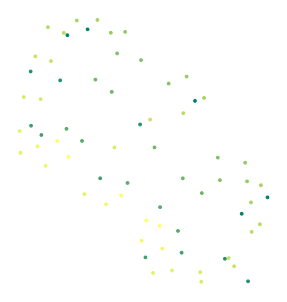

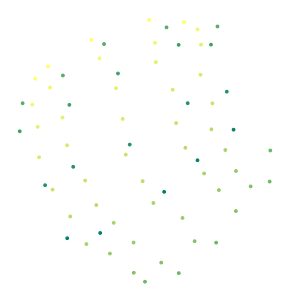

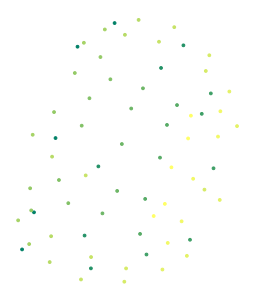

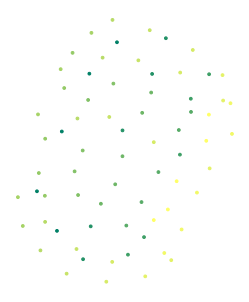

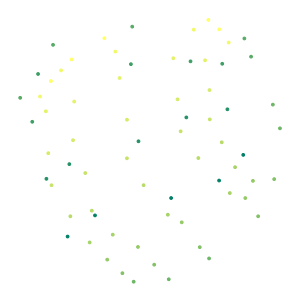

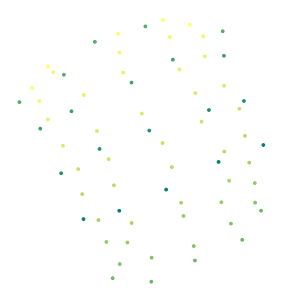

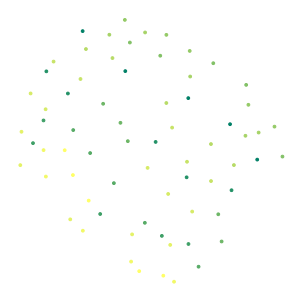

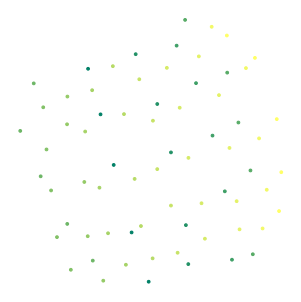

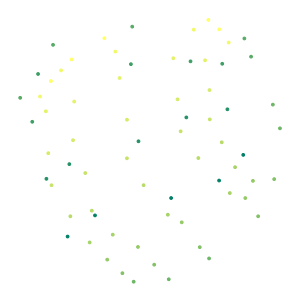

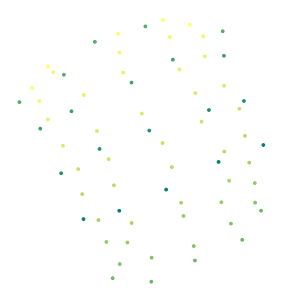

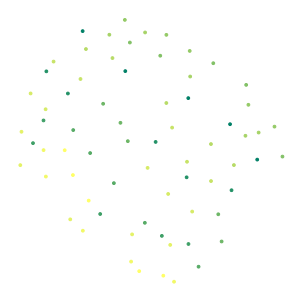

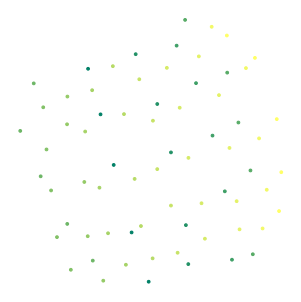

In [768]:
for n_neighbors in [4,5,10,25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=500, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP_'+str(n_neighbors)+'_'+str(min_dist))

# t-SNE

In [759]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

../visualize.py:1339: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


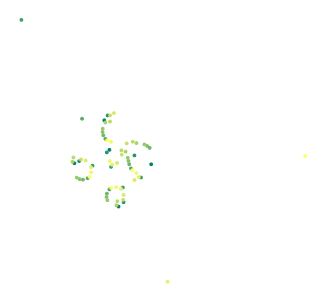

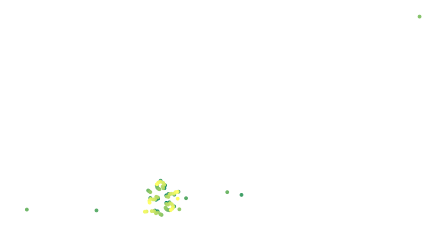

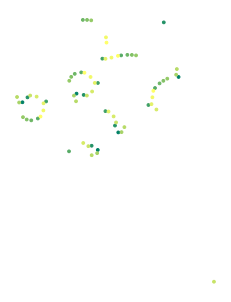

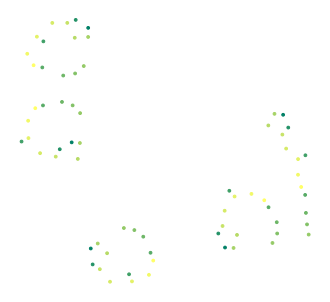

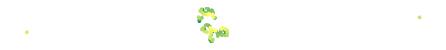

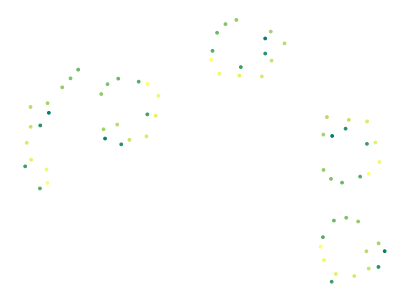

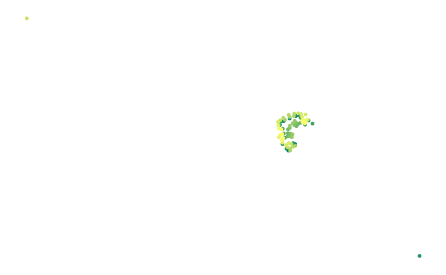

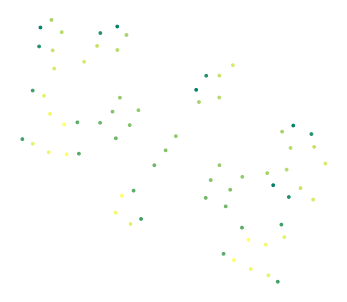

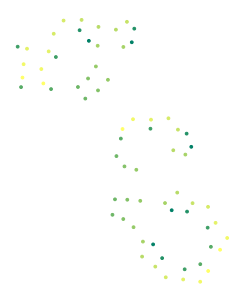

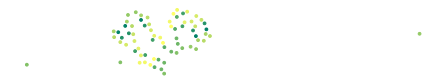

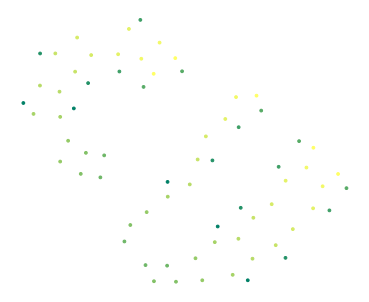

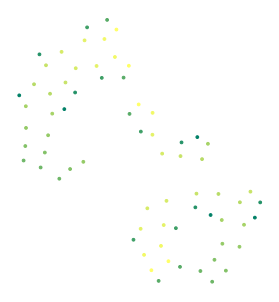

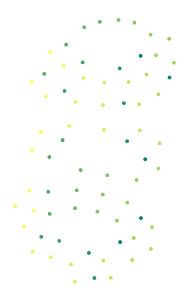

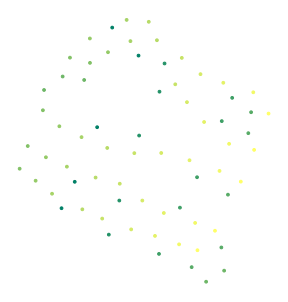

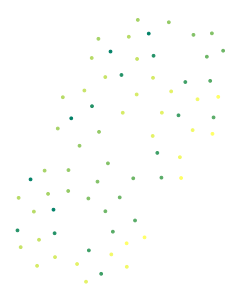

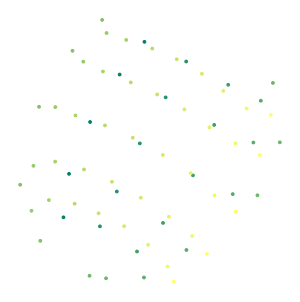

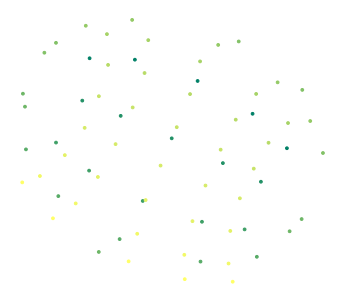

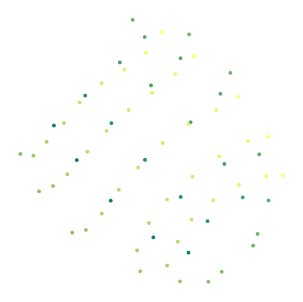

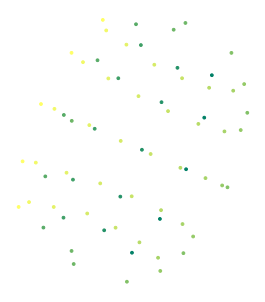

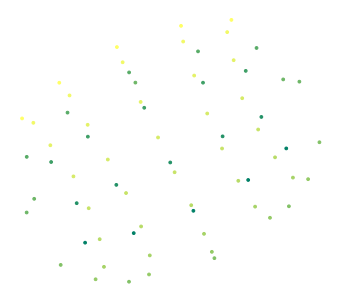

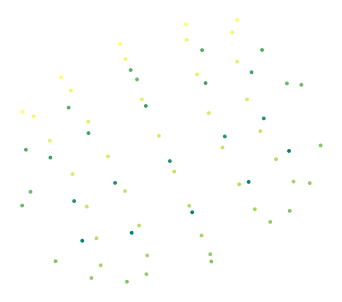

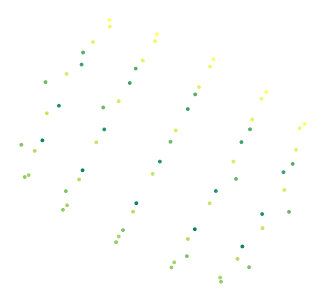

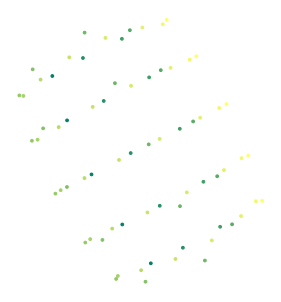

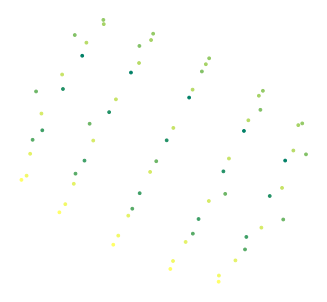

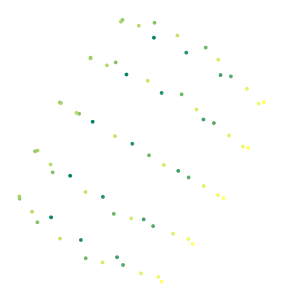

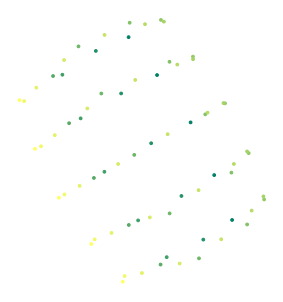

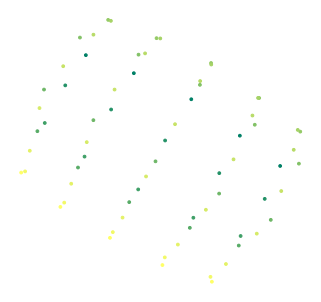

In [760]:
for perplexity in [2,3,4,5,10,30,40,50,60]:
    for ee in [2,4,6]:
        tsne_obj = TSNE(perplexity=perplexity, early_exaggeration=ee, n_components=2,
                        metric='euclidean', random_state=42, n_iter=1000,
                        n_jobs=-1, init='random')
        y_tsne = tsne_obj.fit_transform(X)
        vis.global_embedding(y_tsne, labelsMat[:,0], 'summer', title='t-SNE_'+str(perplexity)+'_'+str(ee))